# **MILESTONE 2 - MACHINE LEARNING**

___

# INTRODUCTION

NAME    : Dewa Dwi Al-matin  
BATCH   : FTDS HCK-013

## Objective
The objective of this project is to develop a robust classification model capable of accurately predicting whether an individual is a smoker or not based on their health report. As a data scientist at our insurance company, our goal is to utilize this model to assess potential users' smoking status effectively. By accurately identifying smokers, we aim to refine our risk assessment processes, enabling us to offer more precise and fair premiums tailored to individuals' health profiles. This predictive model holds significant potential in enhancing our underwriting practices, allowing us to better manage risks associated with smoking-related health issues. Ultimately, this initiative aligns with our commitment to providing personalized and comprehensive insurance solutions to our clients while promoting healthier lifestyles.

## Dataset Information
This dataset is a collection of basic health biological signal data. The goal is to determine the presence or absence of smoking through bio-signals.


- ID : index

- gender
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status
- dental caries
- tartar : tartar status
- smoking


___

# IMPORT LIBRARIES

In [28]:
#data manipulation
import pandas as pd
import numpy as np

#metrics
import phik
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

#pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler

#pipelines
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#saving
import pickle

#others
import warnings
warnings.filterwarnings('ignore')

___

# DATA LOADING

## Loading and Preview

In [2]:
data = pd.read_csv('smoking.csv')
display(data.head(10))
display(data.tail(10))

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55682,55655,M,20,175,75,85.0,0.9,1.5,1.0,1.0,...,16.6,1.0,1.2,13.0,6.0,14.0,Y,0,Y,0
55683,55663,M,40,180,85,86.5,1.2,1.2,1.0,1.0,...,16.3,1.0,1.3,21.0,19.0,38.0,Y,0,N,0
55684,55666,M,40,170,65,85.0,1.2,1.2,1.0,1.0,...,15.6,1.0,1.1,22.0,25.0,33.0,Y,0,Y,1
55685,55671,M,40,170,80,90.5,1.2,1.5,1.0,1.0,...,14.8,1.0,0.9,16.0,28.0,68.0,Y,0,Y,0
55686,55673,F,60,150,50,75.0,1.0,1.2,1.0,1.0,...,12.6,1.0,0.8,26.0,21.0,14.0,Y,0,Y,0
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1


## Preliminary Analysis

### Data Structure

In [5]:
#DataFrame Shape
data.shape

(55692, 27)

In [6]:
#DataFrame Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

### Data Behaviour

In [7]:
#data description
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [8]:
#missing values
data.isna().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

it seems like there are no missing values.

In [9]:
#data duplicates
data.duplicated().sum()

0

it seems like there are also no duplicates in this dataset.

___

# EXPLORATORY DATA ANALYSIS

In [47]:
#split between num cols and cat cols
cat_cols = ['hearing(left)', 'hearing(right)', 'dental caries']
num_cols = ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 
            'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 
            'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']

print('numeric columns: ', num_cols)
print()
print('categorical columns: ', cat_cols)

numeric columns:  ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']

categorical columns:  ['hearing(left)', 'hearing(right)', 'dental caries']


## Data Distributions

In [4]:
#set style
sns.set_style('whitegrid')

#distribution plot function
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

height(cm)


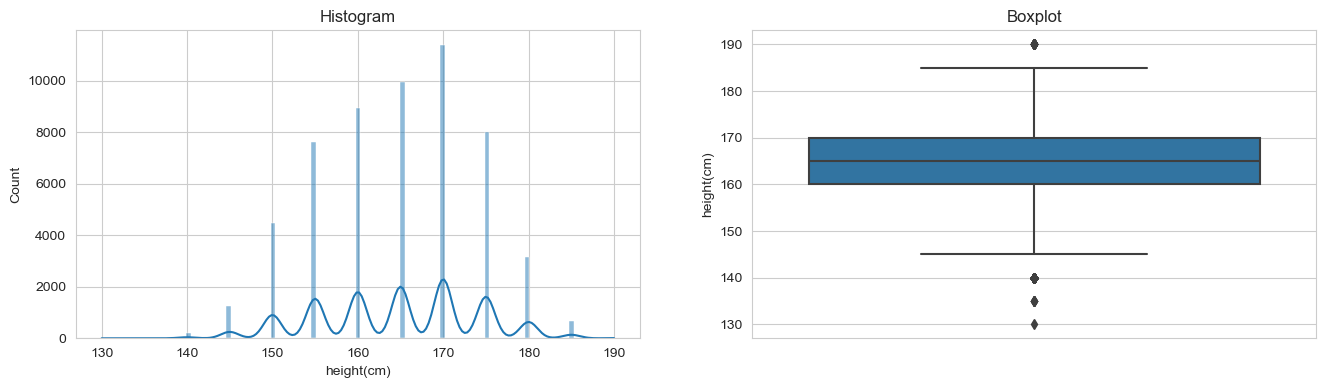

weight(kg)


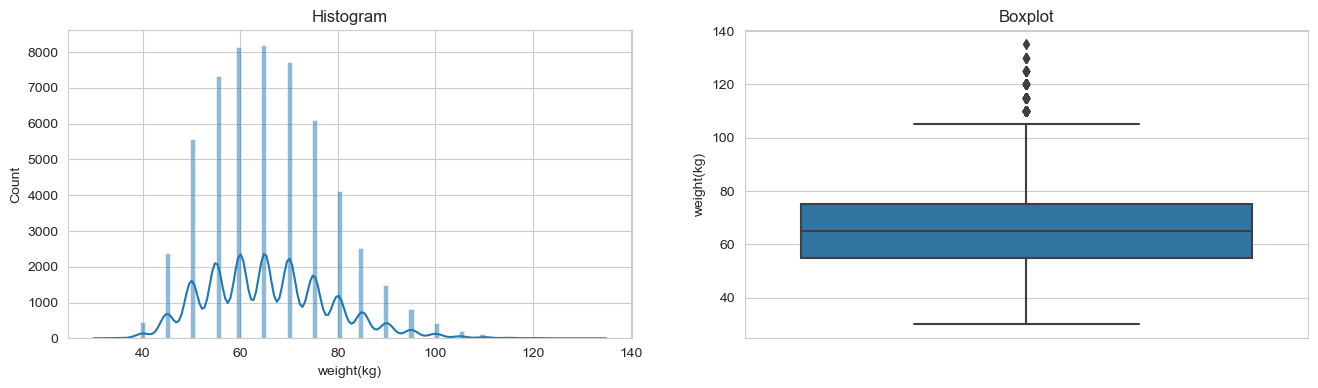

waist(cm)


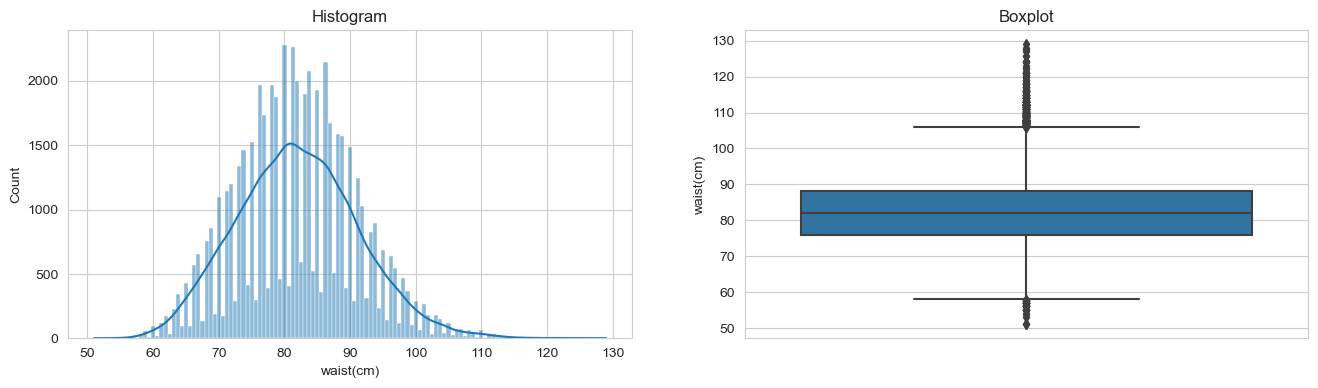

eyesight(left)


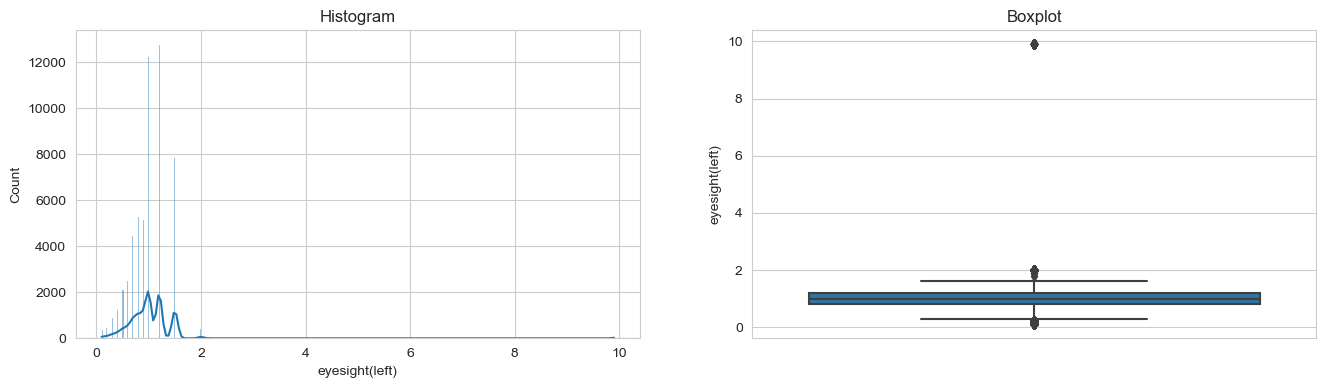

eyesight(right)


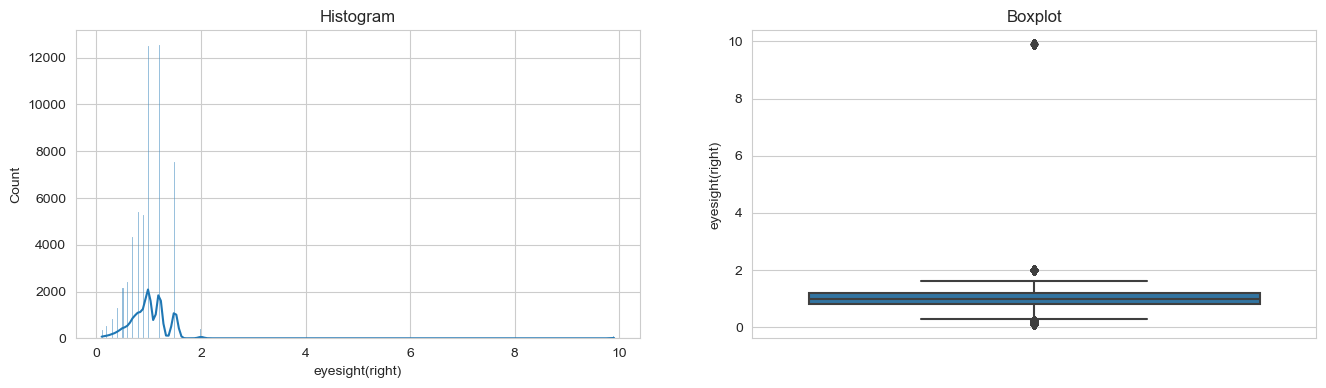

systolic


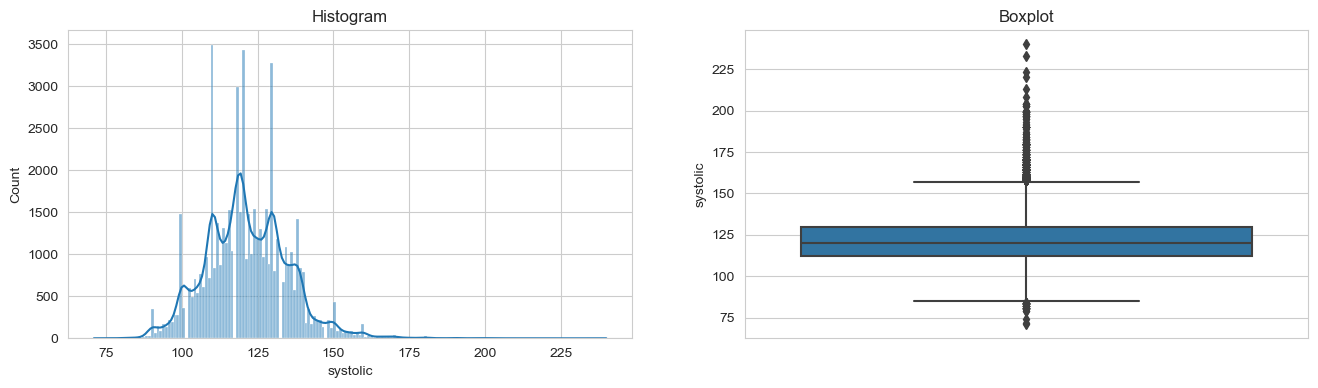

relaxation


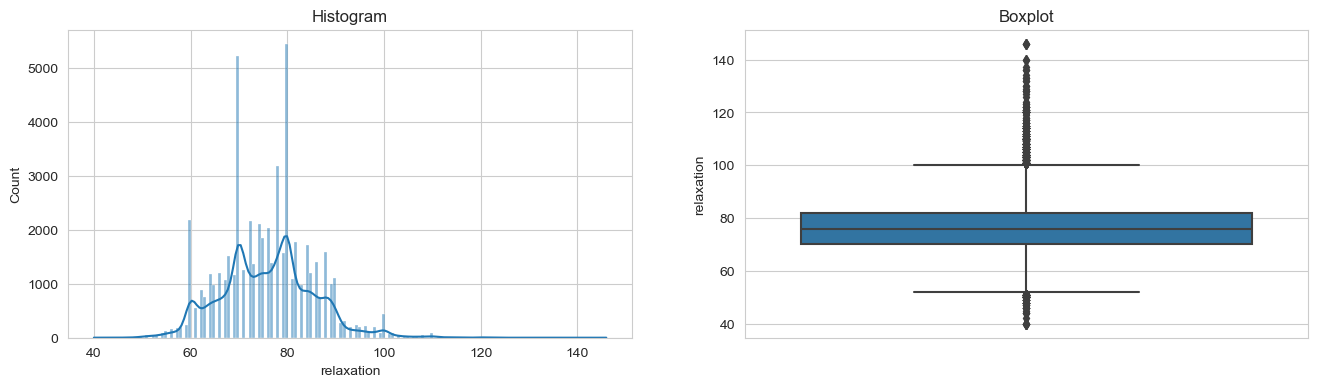

fasting blood sugar


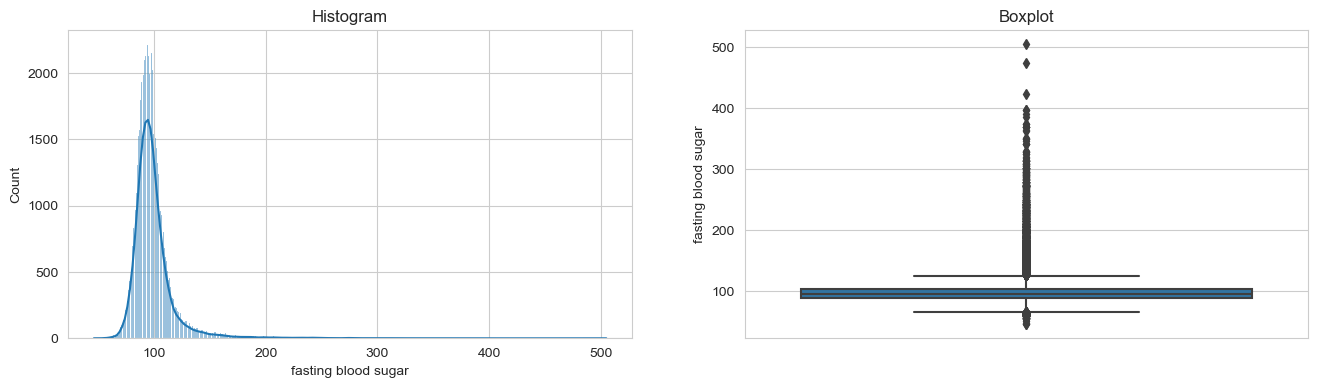

Cholesterol


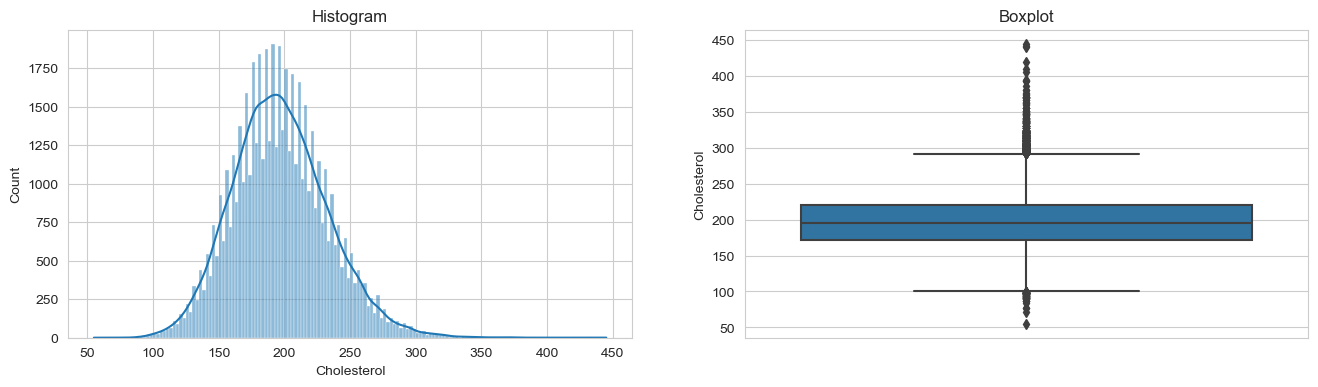

triglyceride


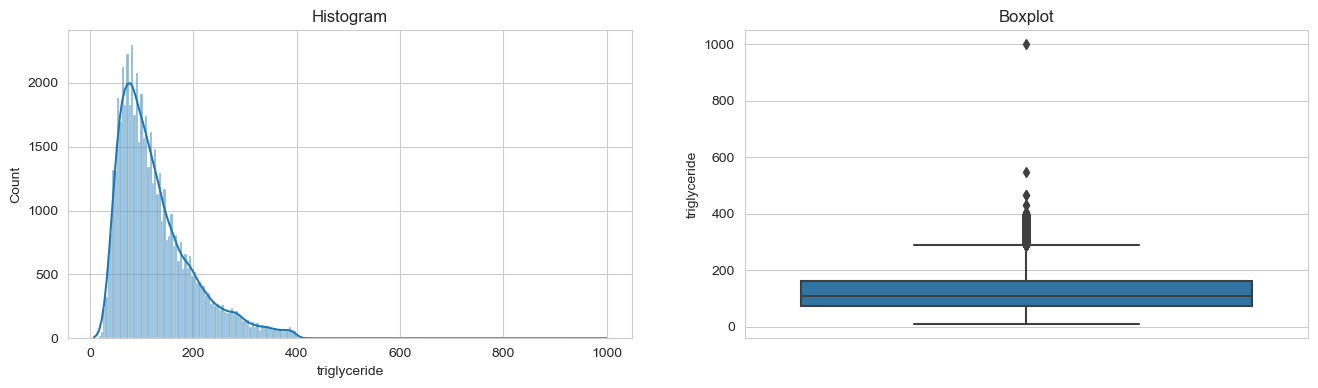

HDL


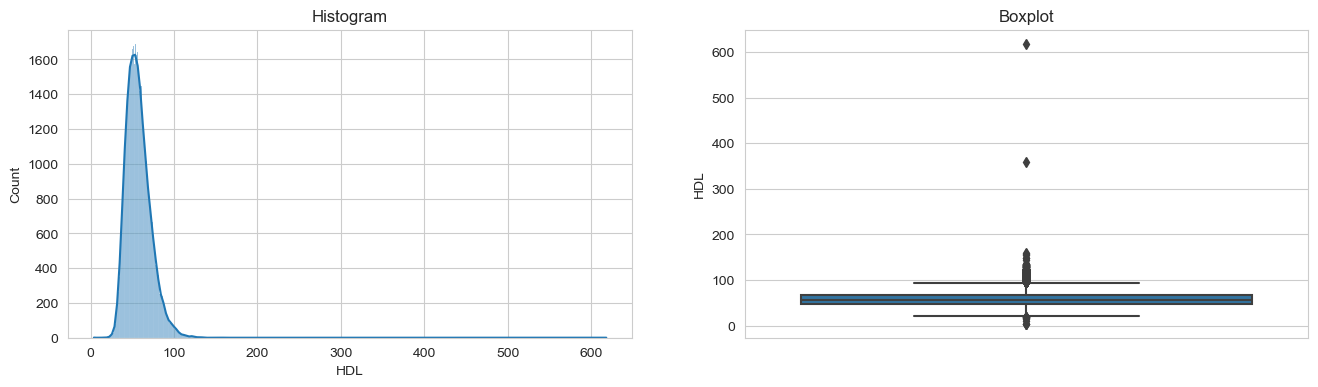

LDL


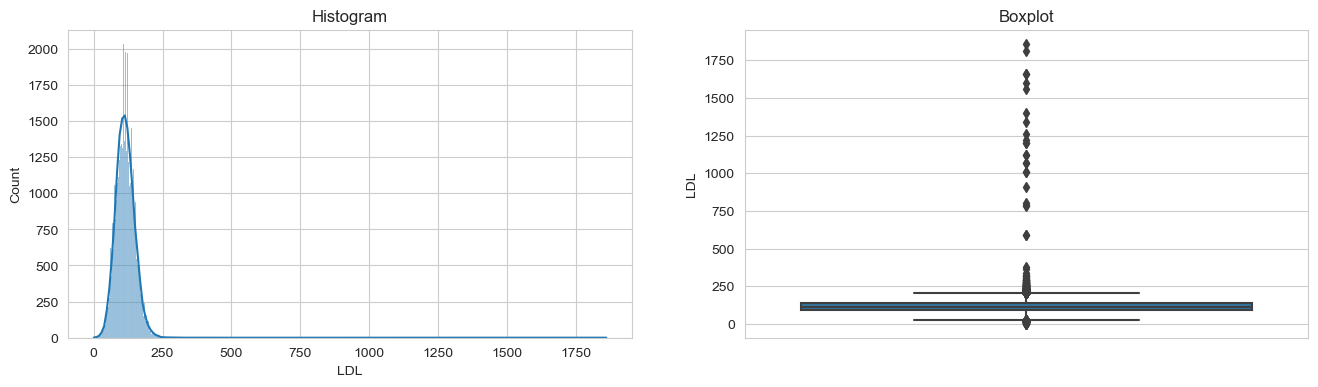

hemoglobin


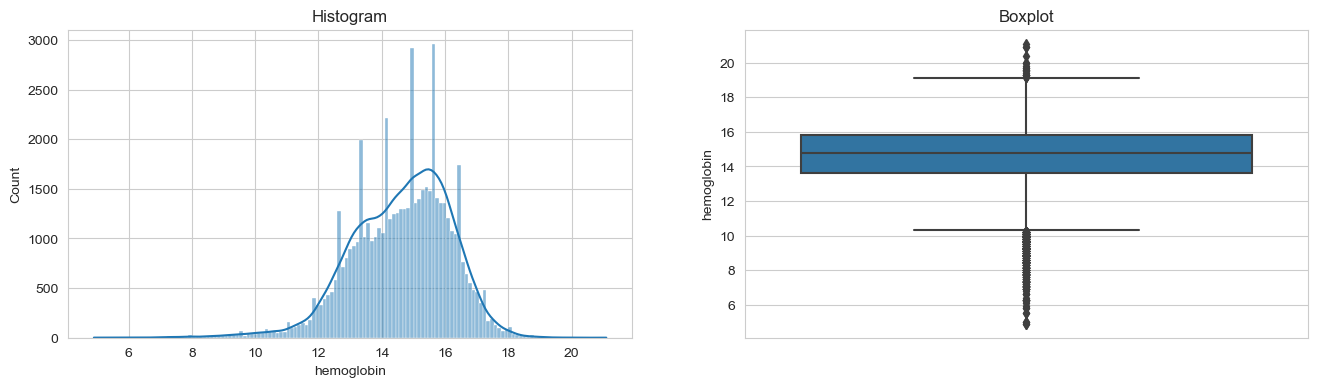

Urine protein


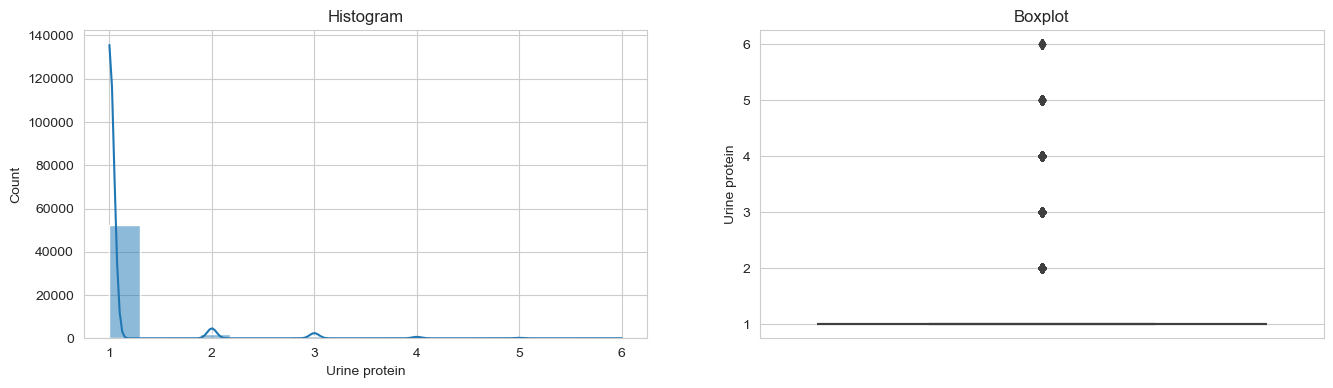

serum creatinine


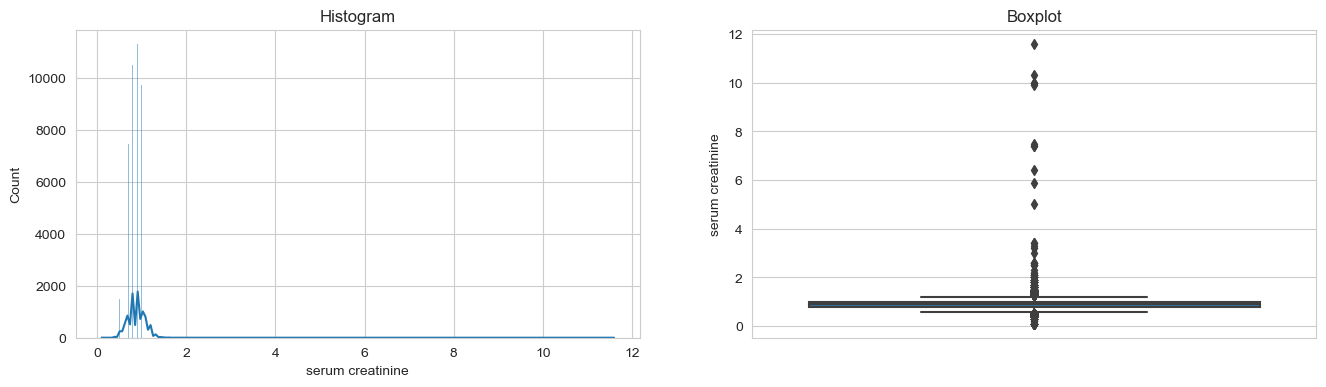

AST


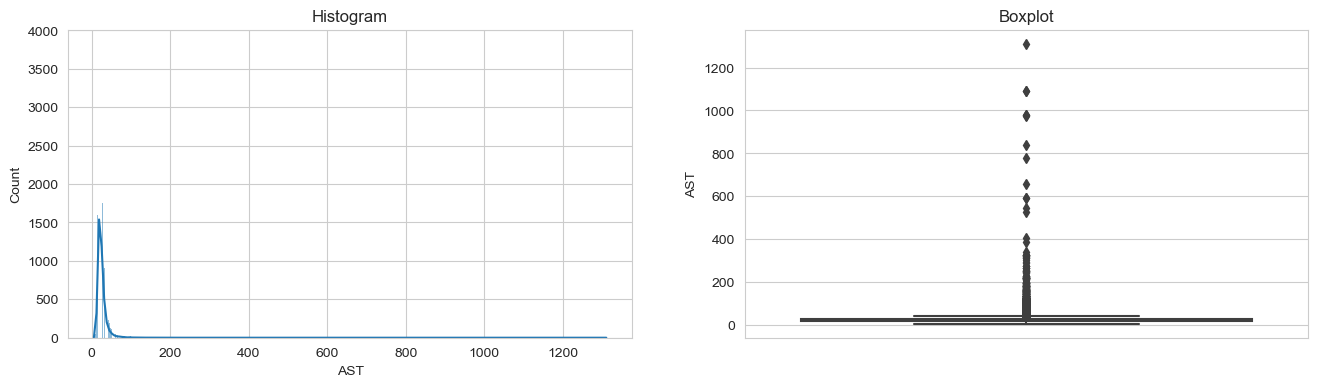

ALT


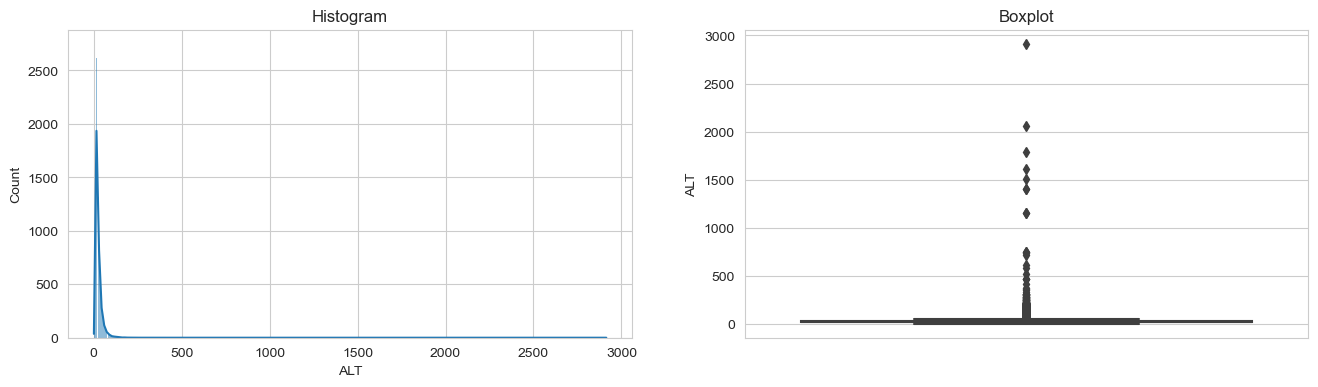

Gtp


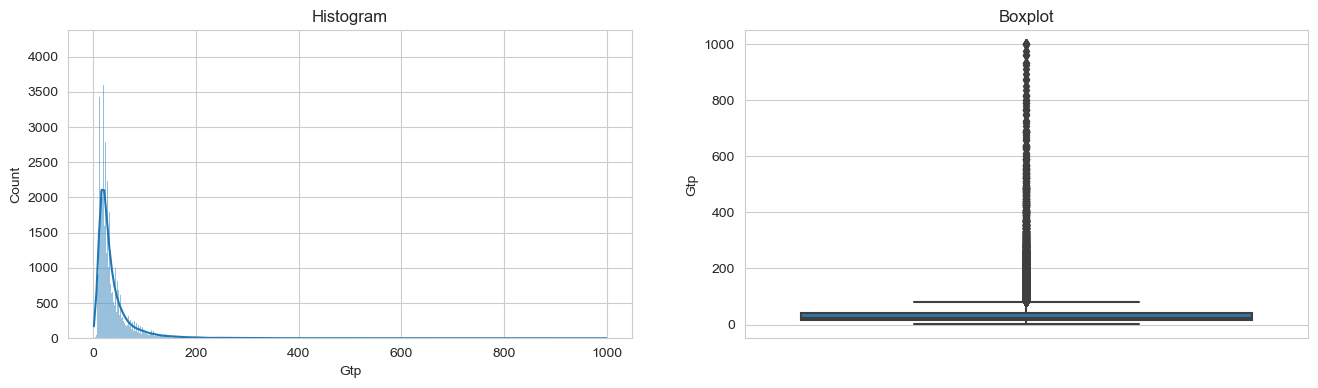

In [48]:
#plot the distribution
for col in num_cols:
  print(f'{col}')
  diagnostic_plots(data, col)

- **Height(cm)**: The slightly negative skewness suggests that there may be a slight tendency for individuals to have higher heights in the dataset. However, the skewness is minimal, indicating a relatively symmetrical distribution of heights overall.

- **Weight(kg)**: The right-skewed distribution of weights suggests that there is a greater concentration of individuals with lower weights compared to higher weights. This skewness could be indicative of a population where lighter weights are more common.

- **Waist(cm)**: Similarly, the right skewness in waist circumferences implies that there may be a higher proportion of individuals with smaller waist measurements in the dataset. This could reflect a population with generally smaller waist sizes.

- **Eyesight (left) and Eyesight (right)**: The significant positive skewness in both eyesight measurements indicates that the majority of individuals have relatively good eyesight, with fewer individuals exhibiting poorer eyesight. This skewness aligns with the expectation that good eyesight is more common in the general population.

- **Systolic and Relaxation**: The slight right skewness in both blood pressure measurements suggests that there may be a slightly higher concentration of individuals with lower blood pressure readings. This could be indicative of a population with generally healthy blood pressure levels.

- **Fasting blood sugar**: The right-skewed distribution of fasting blood sugar levels indicates that there is a greater concentration of individuals with lower blood sugar levels in the dataset. This skewness may reflect a population with predominantly normal or healthy fasting blood sugar levels.

- **Cholesterol, Triglyceride, HDL, and LDL**: The positive skewness in these lipid profile measurements suggests that there is a higher concentration of individuals with lower cholesterol, triglyceride, HDL, and LDL levels in the dataset. This skewness aligns with the expectation that healthier lipid profiles are more common in the general population.

- **Hemoglobin:** The slightly left-skewed distribution of hemoglobin levels implies that there may be a slight concentration of individuals with higher hemoglobin levels in the dataset. This could reflect a population with generally healthy hemoglobin levels.

- **Urine protein**: The positive skewness in urine protein levels suggests that there is a higher concentration of individuals with lower protein levels in the dataset. This skewness may indicate a population with predominantly normal or healthy urine protein levels.

- **Serum creatinine, AST, ALT, and Gtp**: The significant positive skewness in these biomarker measurements indicates that there is a higher concentration of individuals with lower creatinine, AST, ALT, and Gtp levels in the dataset. This skewness aligns with the expectation that healthier biomarker levels are more common in the general population.

## Correlation Analysis

interval columns not set, guessing: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


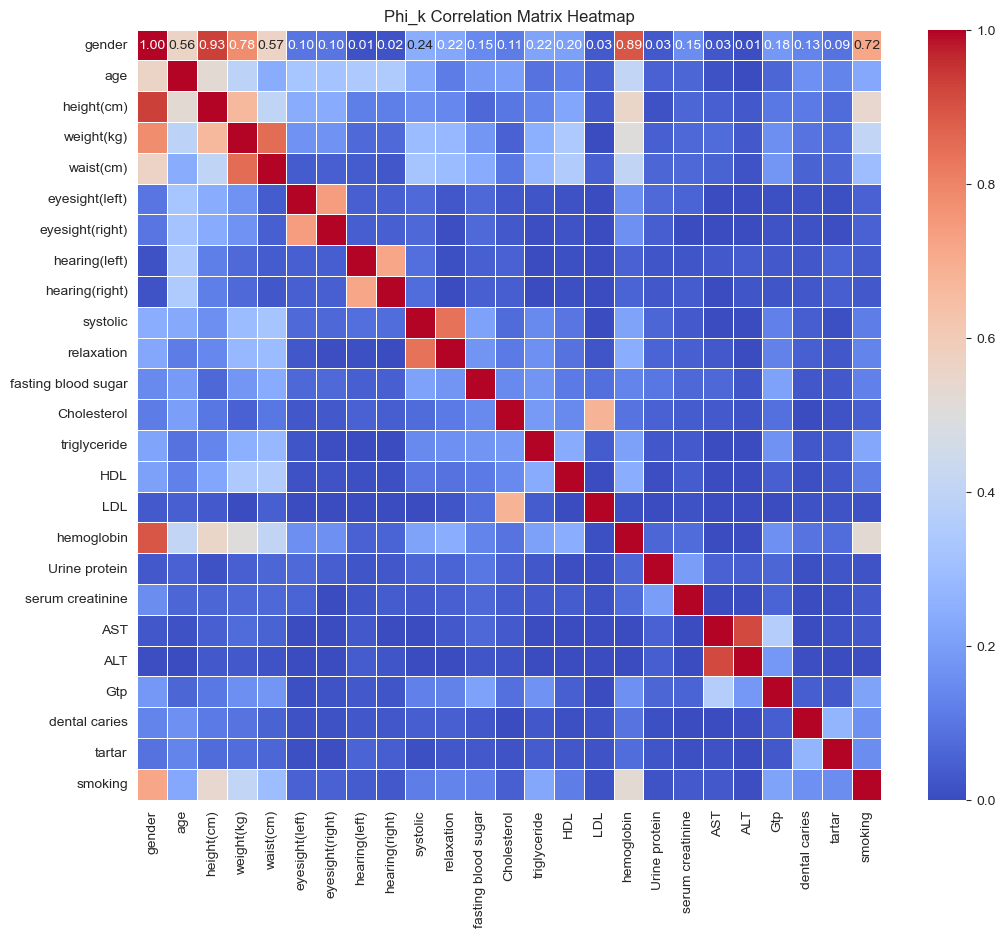

In [13]:
df_corr = data.copy()
df_corr = df_corr.drop(columns='ID')

#calculating the phi_k correlation matrix
phi_k_correlation = df_corr.phik_matrix()

#plot the matrix
plt.figure(figsize=(12, 10))
sns.heatmap(phi_k_correlation, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.title('Phi_k Correlation Matrix Heatmap')
plt.show()

- obvious multicolinearity between demographical data (gender, age, height, weight, waist)
- strong correlation between paired features (hearing, eyesight, heart rythms, AST & ALT)
- strong bias with demographical feature (gender, age) (might have to drop)
- pretty strong smoking definer is hemoglobin
- no other strong correlation with smoking (pretty huge concern for the model)

## Smoker by Gender

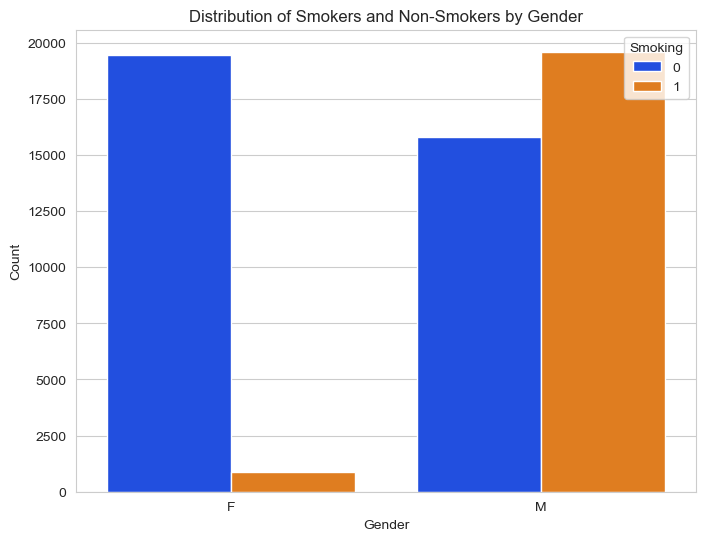

In [42]:
df_gender = data[['gender', 'smoking']]

plt.figure(figsize=(8, 6))
sns.countplot(data=df_gender, x='gender', hue='smoking', palette='bright')
plt.title('Distribution of Smokers and Non-Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking', loc='upper right')
plt.show()

- almost no females is a smoker
- a good reason to drop this column (high bias)
- most men smoke
- most of the data are men

## Smoker by Age

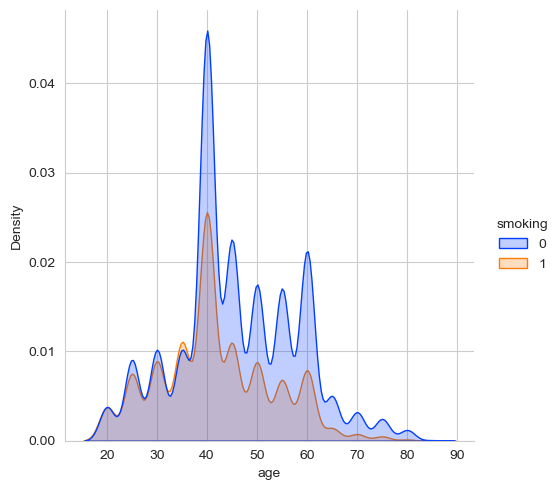

In [46]:
df_age = data[['age', 'smoking']]
sns.displot(df_age, x='age', hue="smoking", kind="kde", fill=True, palette='bright')

- plot is wiggly because it is grouped in 5 years bin.
- extreme high in 40 since the data is centered around that age.
- intresting point in mid 30s since the smoker is higher than the non smoker.

## Demography Built

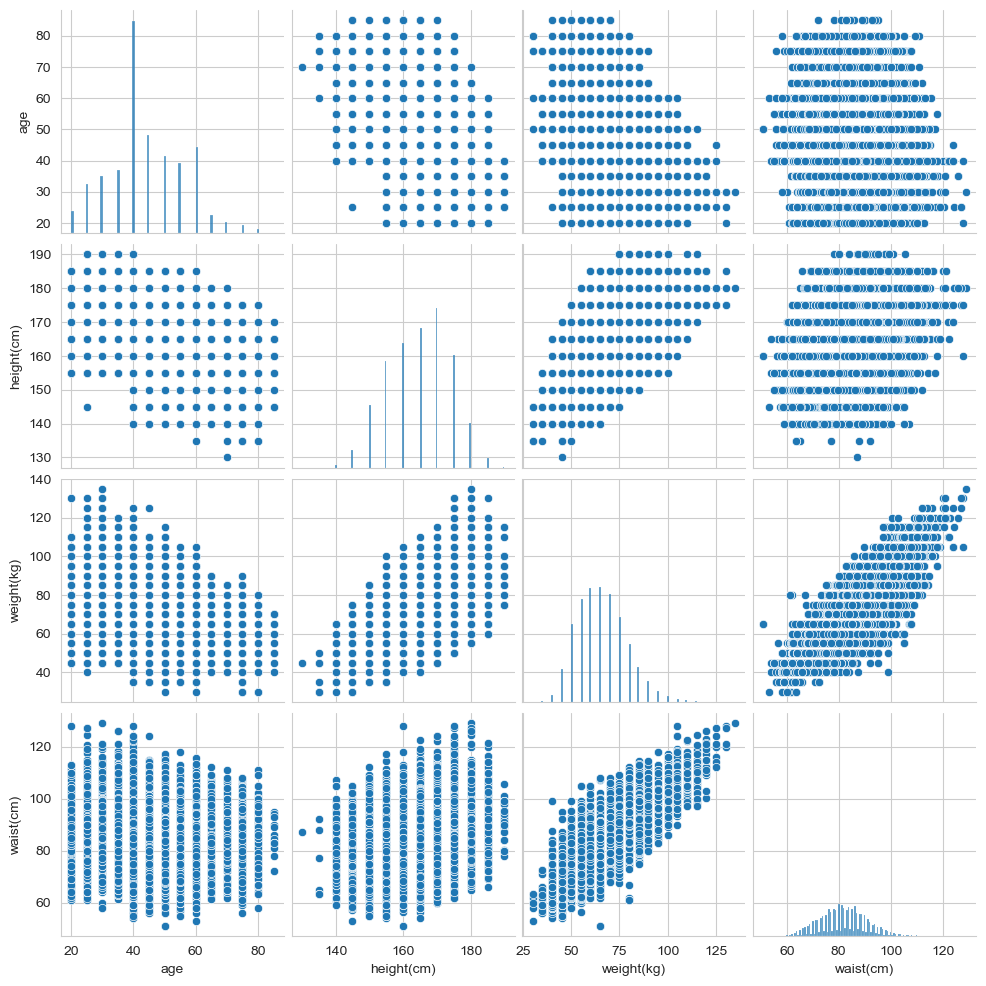

In [43]:
#Pairplot
corr_cols = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)']
sns.pairplot(data[corr_cols])

___

- **Age**:
    - No significant pattern.
    - except slight decreasing trend in weight. Meaning that the older you get, the thinner you become.

- **Height**:
    - pretty obvious pattern with weight.
    - meaning taller people are heavier.

- **Weight**:
    - Same point with height.
    - Strong correlation with waist size.
    - meaning the fatter you are the bigger you are.

- **Waist**:
    - Same with the previous points.

# FEATURE ENGINEERING

## Handling Cardinality

In [5]:
#count cardinality
pd.set_option('display.max_colwidth', None)
listItem = []
for col in cat_cols:
  listItem.append([col, data[col].nunique(), data[col].unique()])

#show result
pd.DataFrame(columns=['col name', 'unique count', 'unique values'], data=listItem)

,col name,unique count,unique values
0,hearing(left),2,"[1.0, 2.0]"
1,hearing(right),2,"[1.0, 2.0]"
2,dental caries,2,"[0, 1]"


it seems like the categorical columns are low in cardinality and there is no need for further adjusments.

## Data Splitting

In [6]:
# split data into features and target variable
X = data.drop('smoking', axis=1)
y = data['smoking']

# split the data into training and temporary sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shapes of the transformed sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44553, 26)
X_test shape: (11139, 26)
y_train shape: (44553,)
y_test shape: (11139,)


## Handling Outliers

### Checking Skewness

In [16]:
num_cols

['height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp']

In [50]:
#calculate skewness
listItem= []
for col in num_cols:
  listItem.append([col, X_train[col].skew()])

#show result
skewness = pd.DataFrame(columns=['column name', 'skewness score'], data= listItem)
skewness

,column name,skewness score
0,height(cm),-0.137216
1,weight(kg),0.523419
2,waist(cm),0.241032
3,eyesight(left),9.927819
4,eyesight(right),10.022479
5,systolic,0.490556
6,relaxation,0.411857
7,fasting blood sugar,4.384396
8,Cholesterol,0.395531
9,triglyceride,1.321842


In [51]:
#filter skewed only
skewed = skewness[abs(skewness['skewness score']) > 0.5]
skewed

,column name,skewness score
1,weight(kg),0.523419
3,eyesight(left),9.927819
4,eyesight(right),10.022479
7,fasting blood sugar,4.384396
9,triglyceride,1.321842
10,HDL,2.218286
11,LDL,10.648677
12,hemoglobin,-0.652592
13,Urine protein,5.628868
14,serum creatinine,7.256217


In [52]:
skewed_col = skewed['column name'].tolist()

normal_col = skewness['column name'].tolist()
normal_col = [i for i in normal_col if i not in skewed_col]

print(f'skewed columns: {skewed_col}')
print()
print(f'normal columns: {normal_col}')

skewed columns: ['weight(kg)', 'eyesight(left)', 'eyesight(right)', 'fasting blood sugar', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']

normal columns: ['height(cm)', 'waist(cm)', 'systolic', 'relaxation', 'Cholesterol']


### Winsorizer

In [53]:
#move urine protein column because of low variation
skewed_col.pop(8)
normal_col.append('Urine protein')

In [54]:
#capping the normally distributed columns
winsoriser_age = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_col,
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [55]:
#capping the skewedly distributed columns
winsoriser2 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=skewed_col,
                            missing_values='ignore')

X_train_capped = winsoriser2.fit_transform(X_train_capped)
X_test_capped = winsoriser_age.transform(X_test_capped)

### Compare Distribution

height(cm) - Before Capping


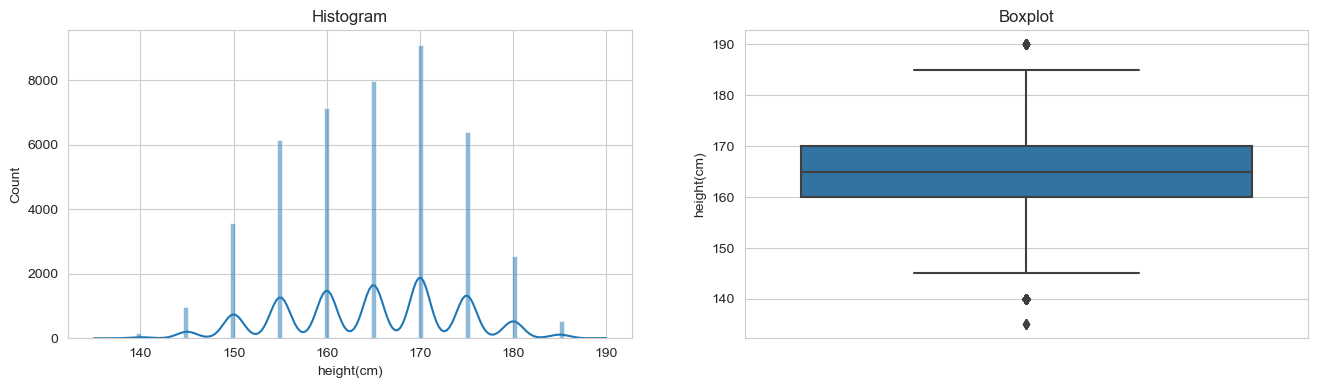


height(cm) - After Capping


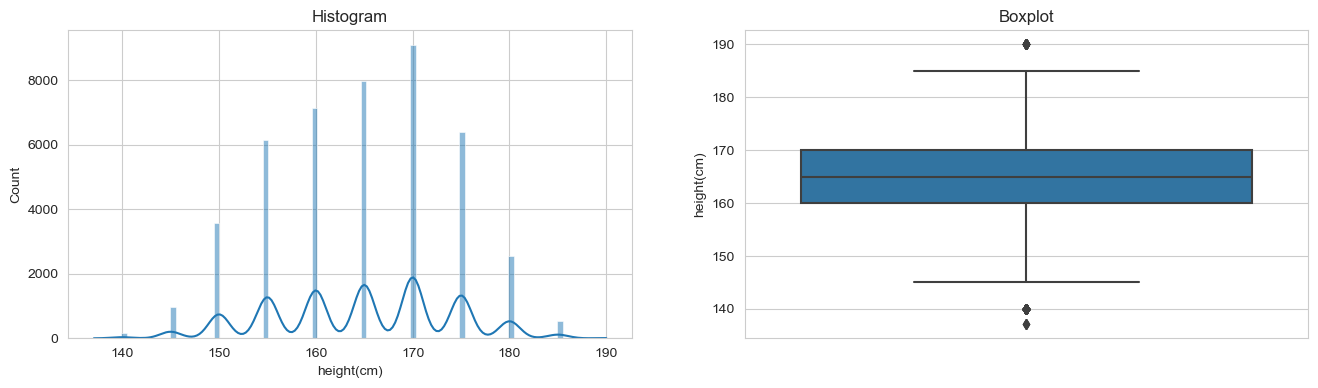

weight(kg) - Before Capping


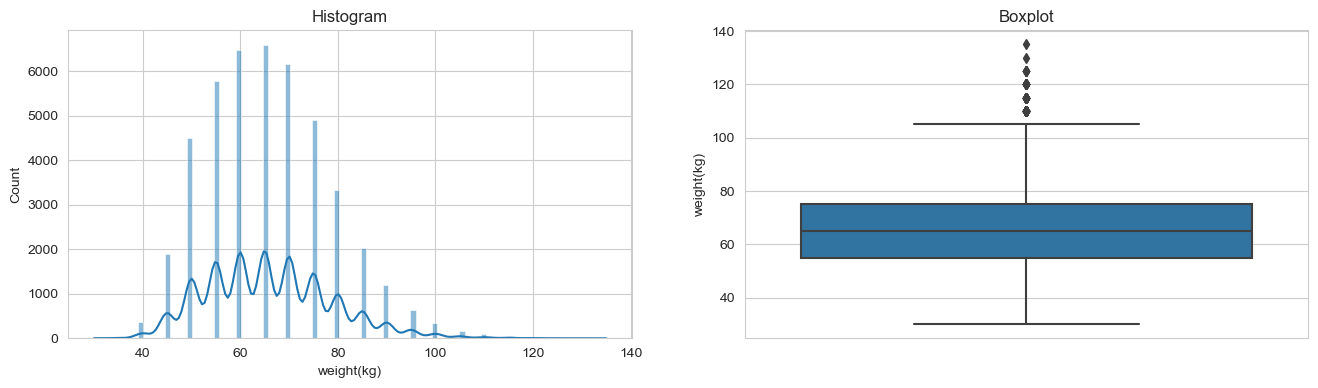


weight(kg) - After Capping


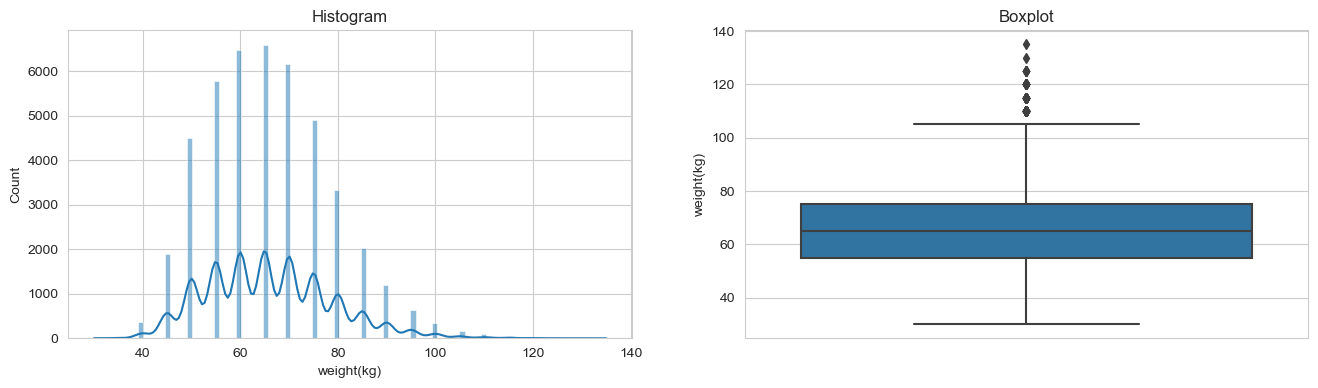

waist(cm) - Before Capping


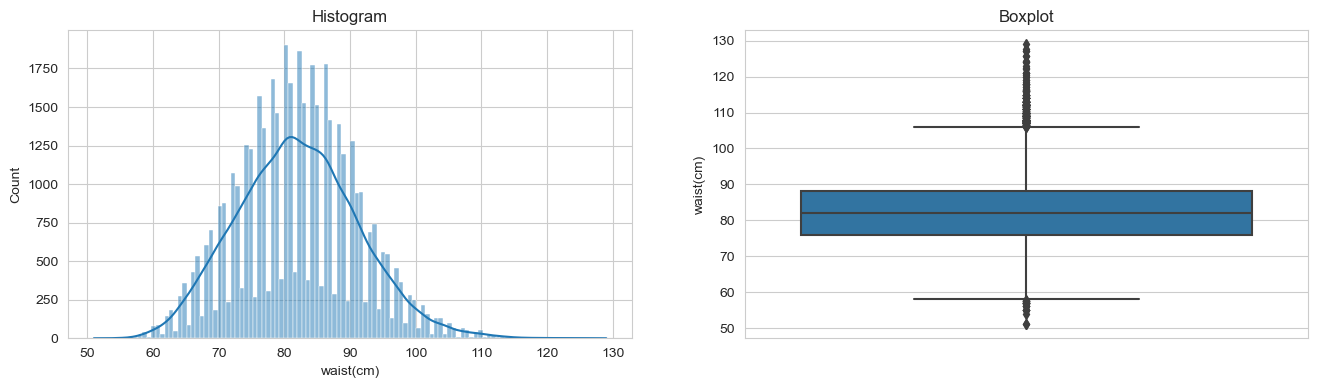


waist(cm) - After Capping


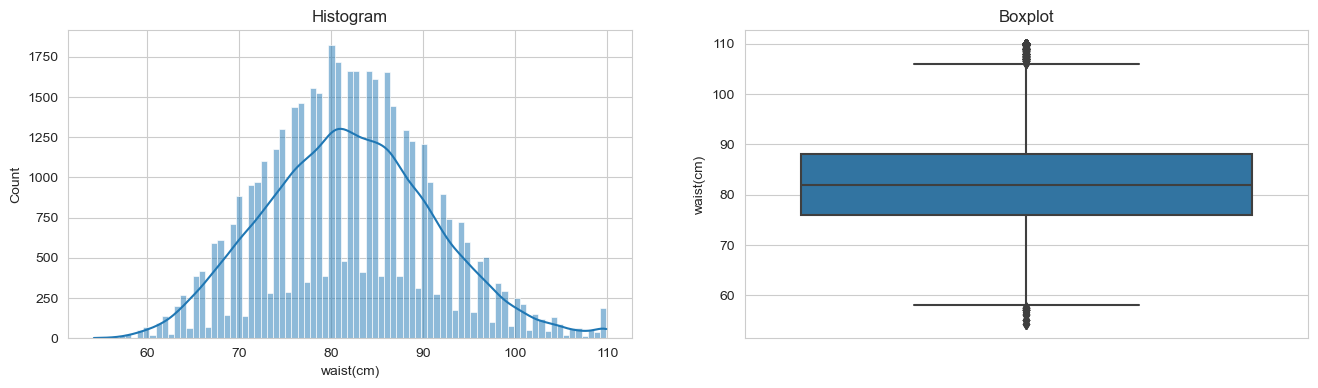

eyesight(left) - Before Capping


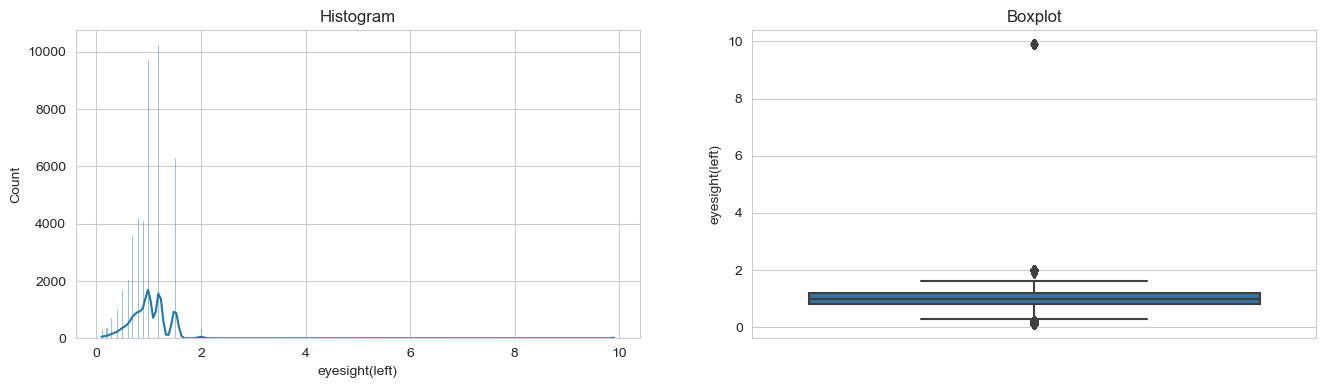


eyesight(left) - After Capping


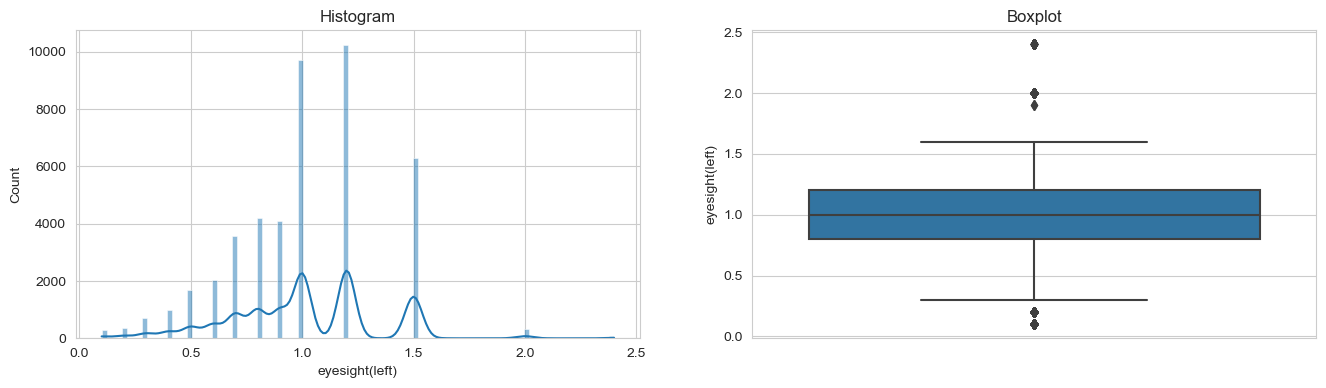

eyesight(right) - Before Capping


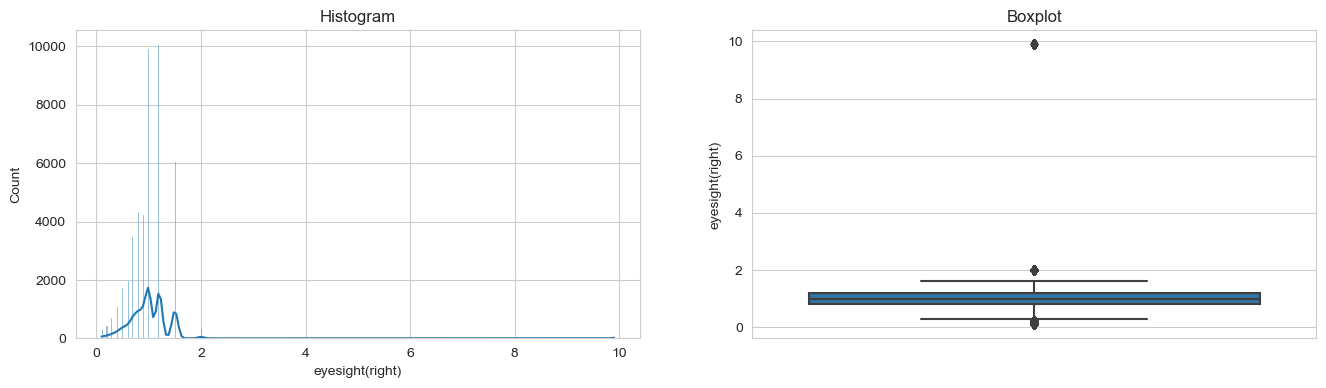


eyesight(right) - After Capping


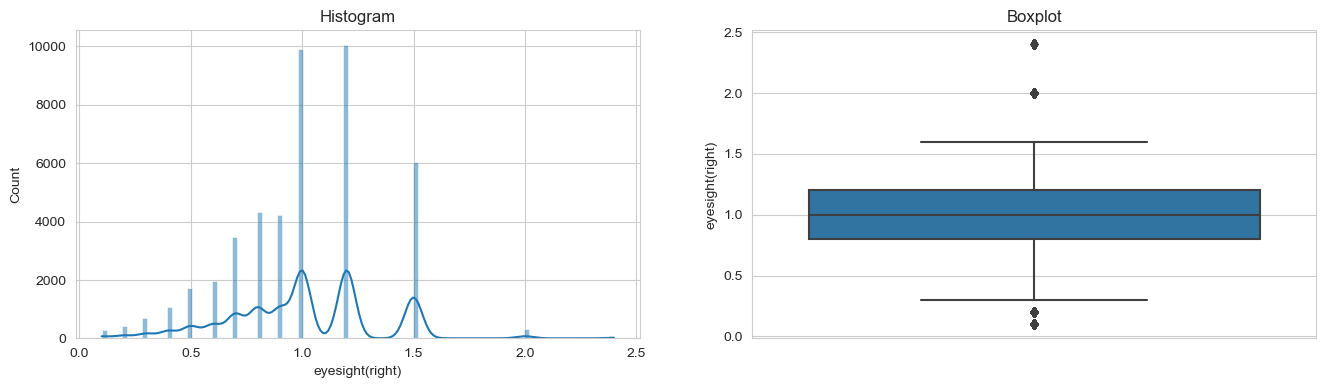

systolic - Before Capping


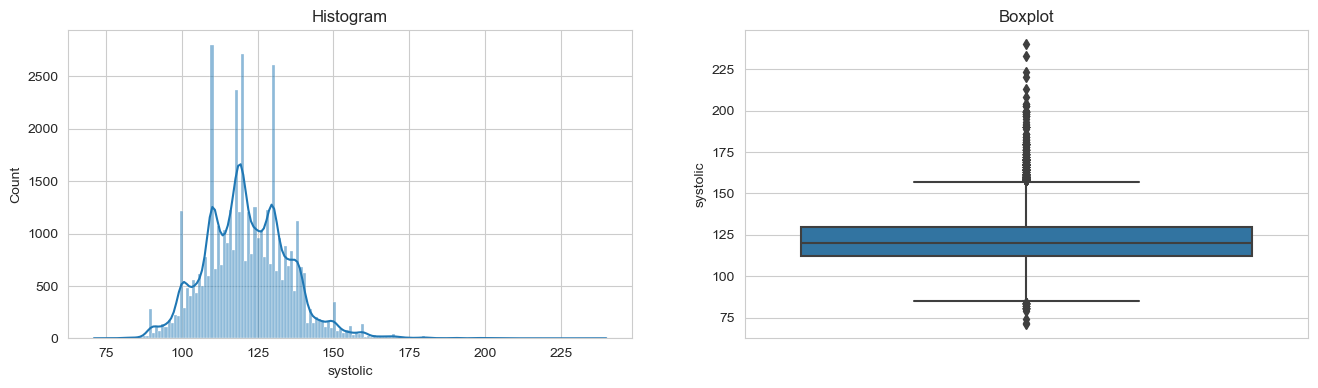


systolic - After Capping


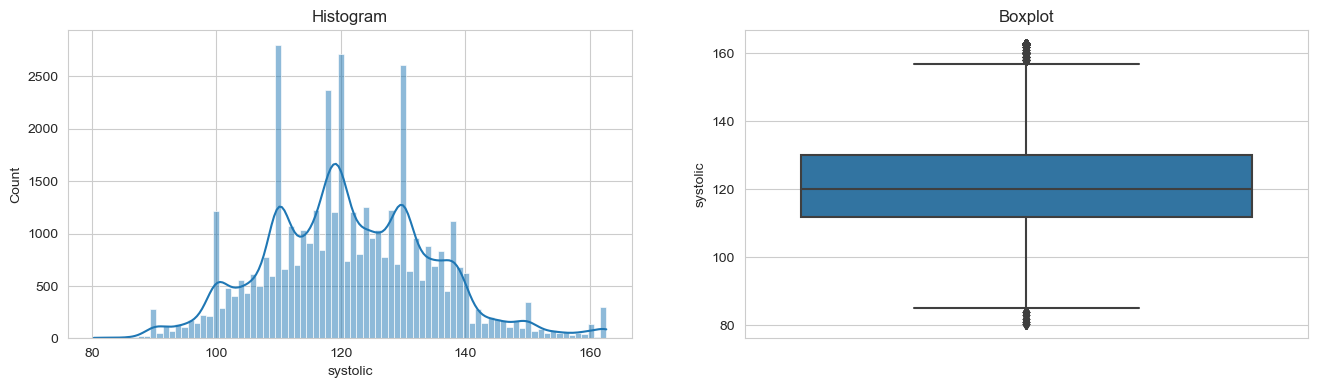

relaxation - Before Capping


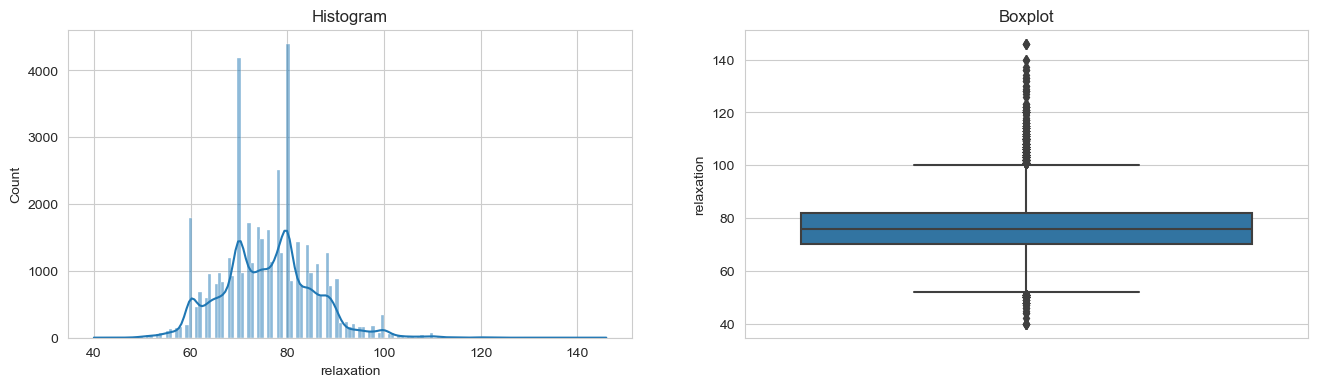


relaxation - After Capping


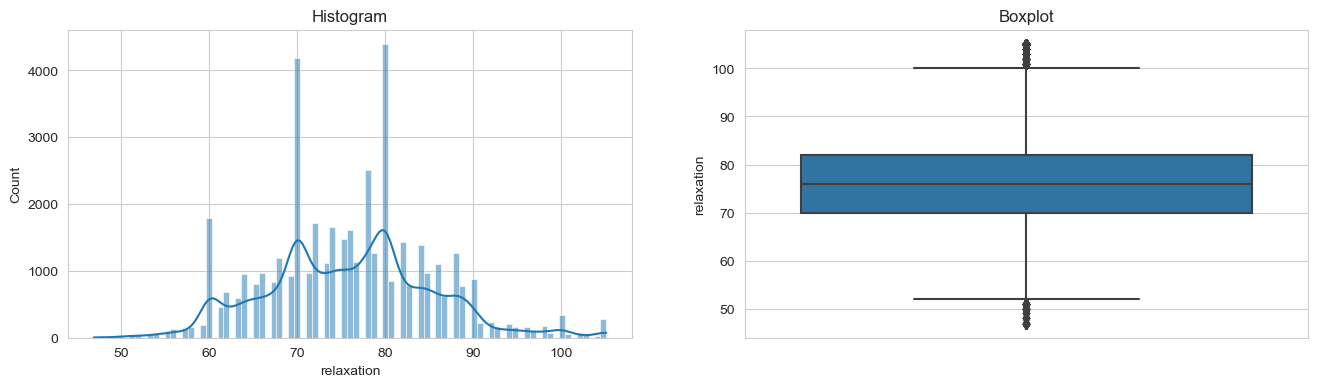

fasting blood sugar - Before Capping


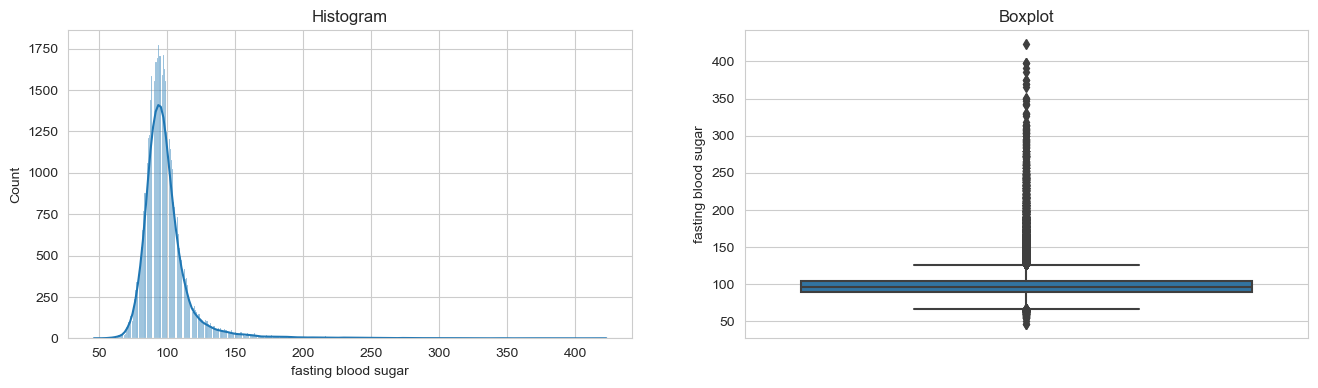


fasting blood sugar - After Capping


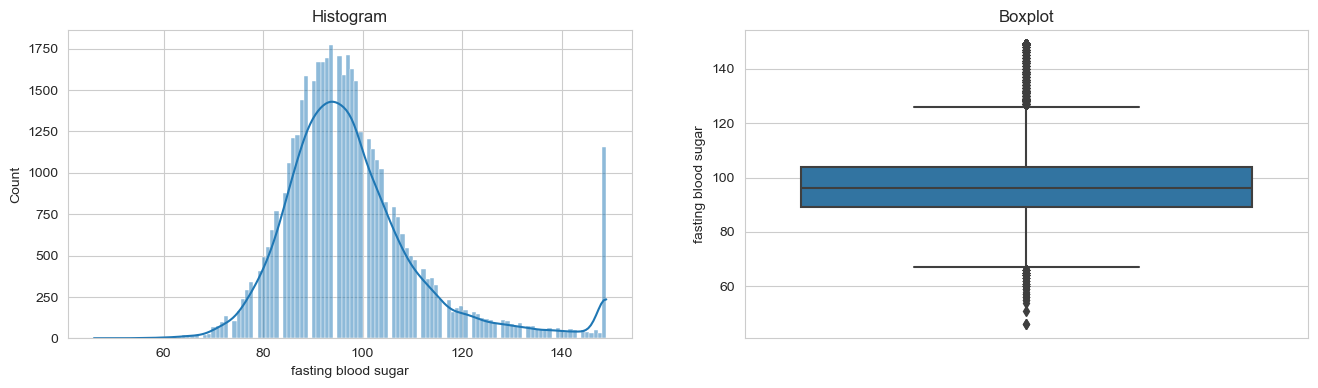

Cholesterol - Before Capping


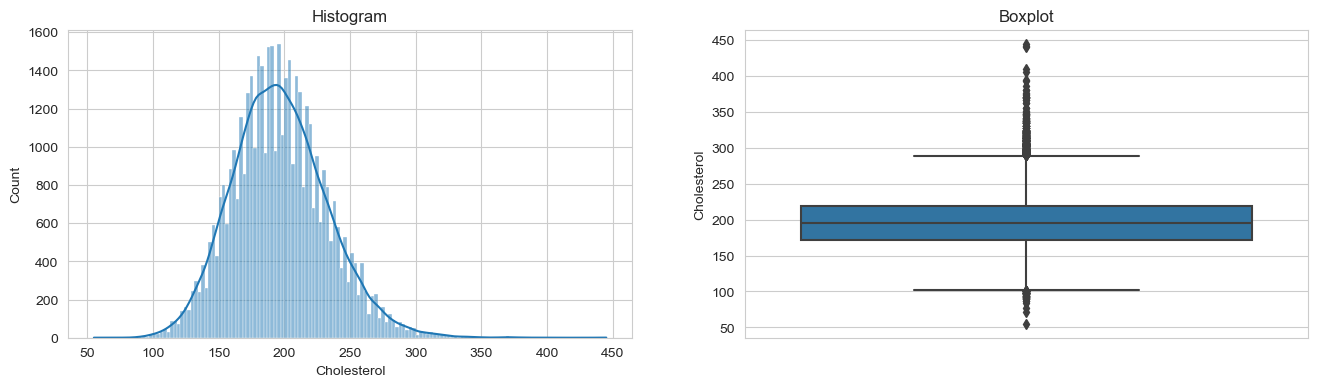


Cholesterol - After Capping


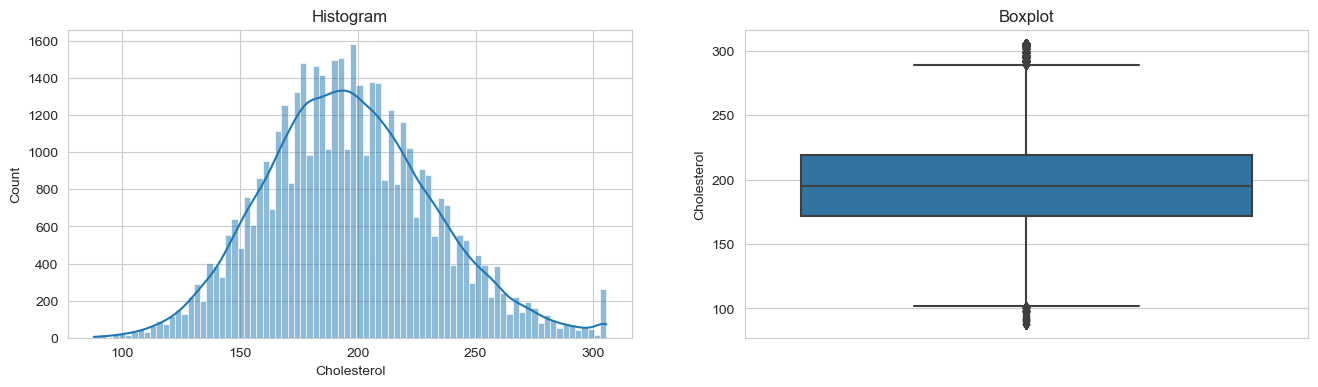

triglyceride - Before Capping


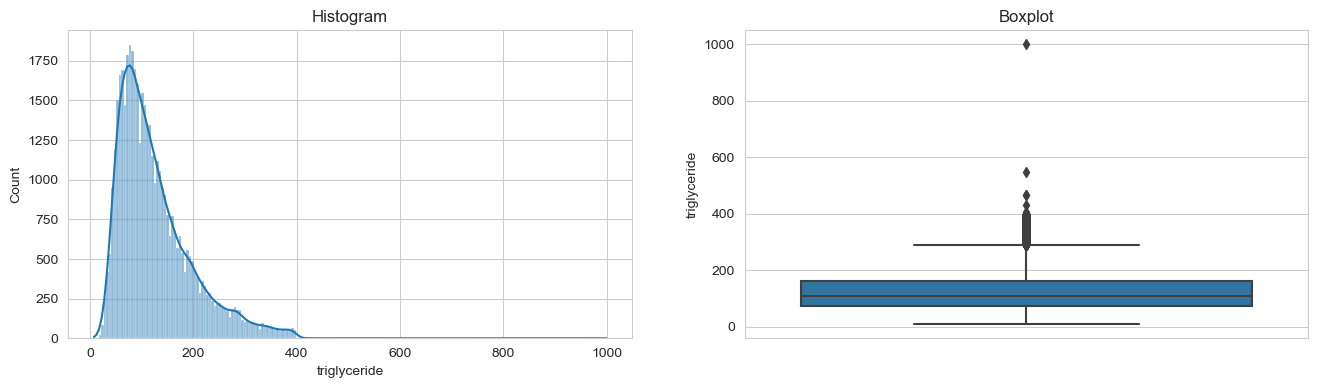


triglyceride - After Capping


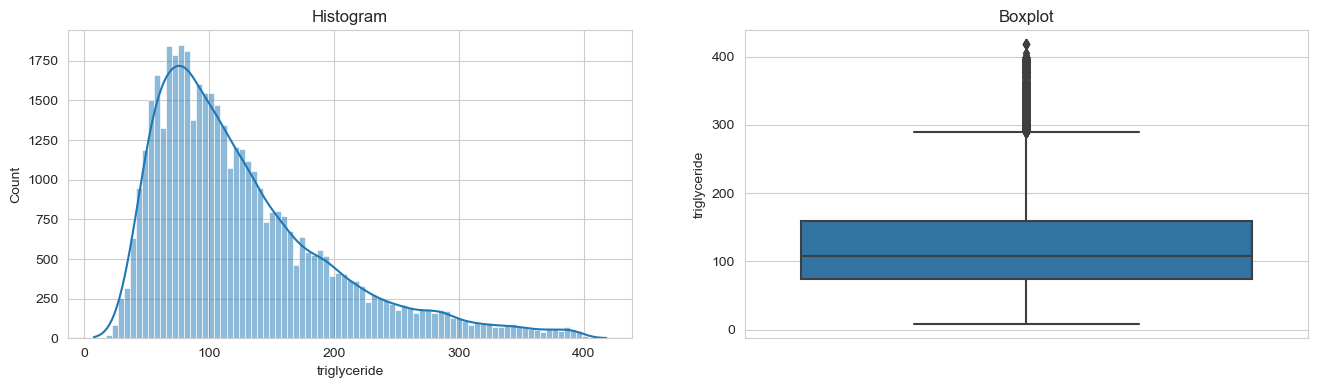

HDL - Before Capping


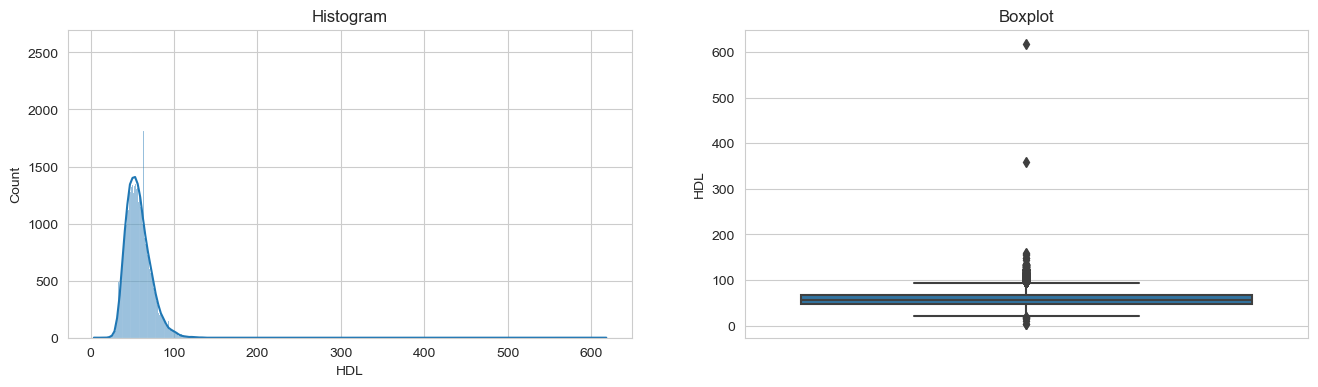


HDL - After Capping


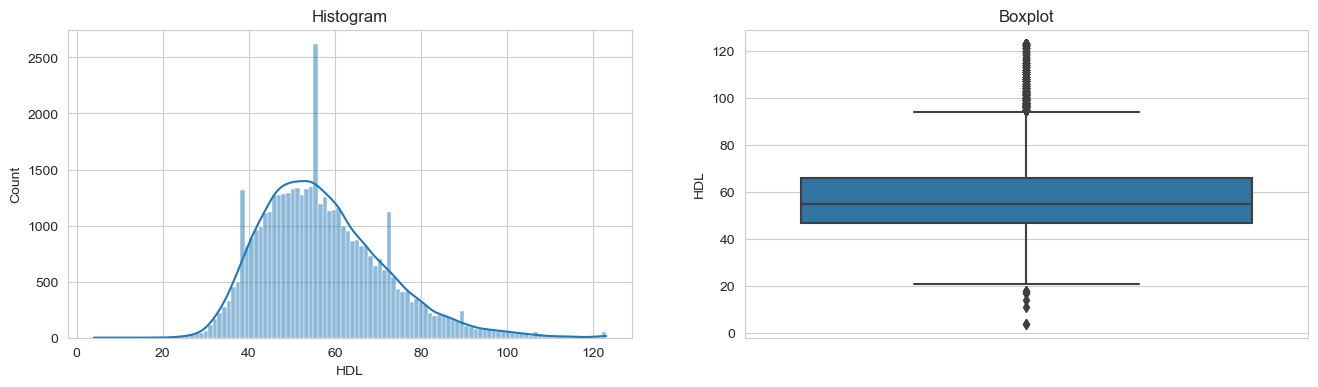

LDL - Before Capping


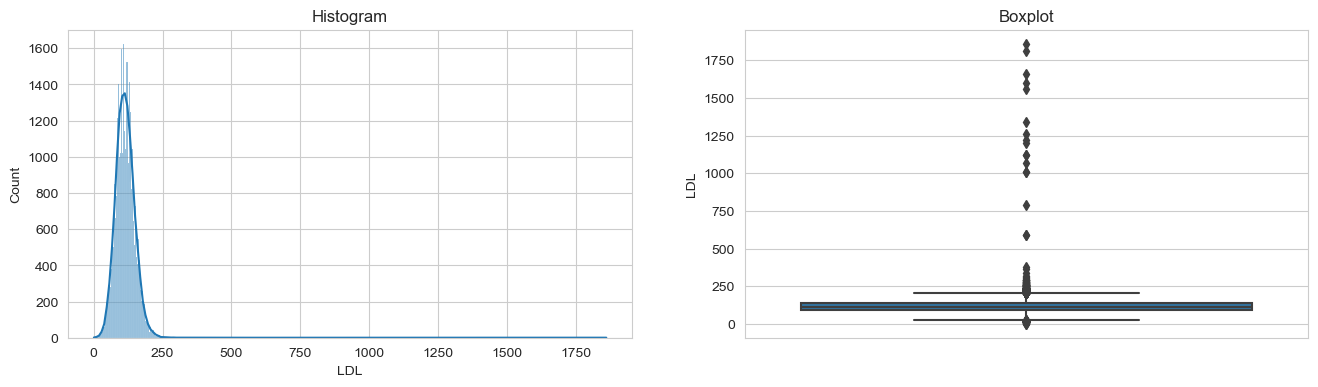


LDL - After Capping


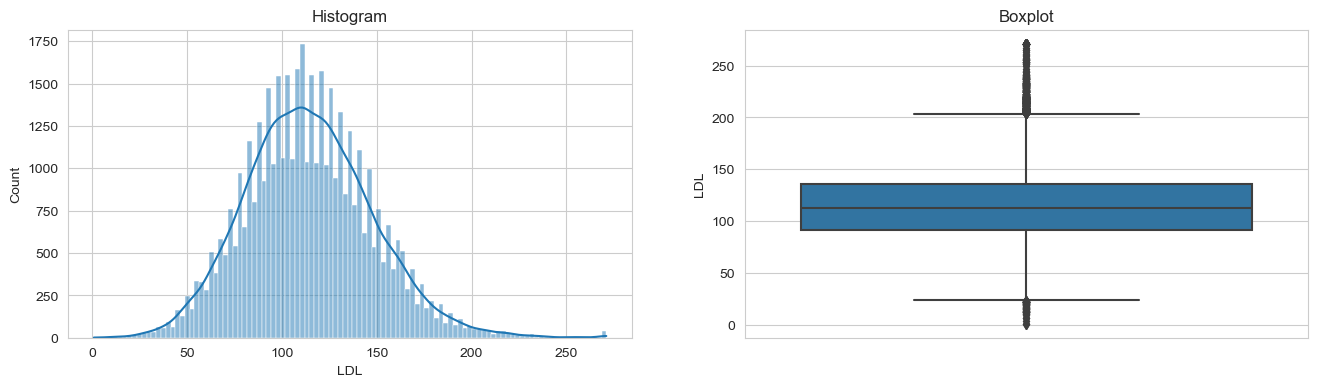

hemoglobin - Before Capping


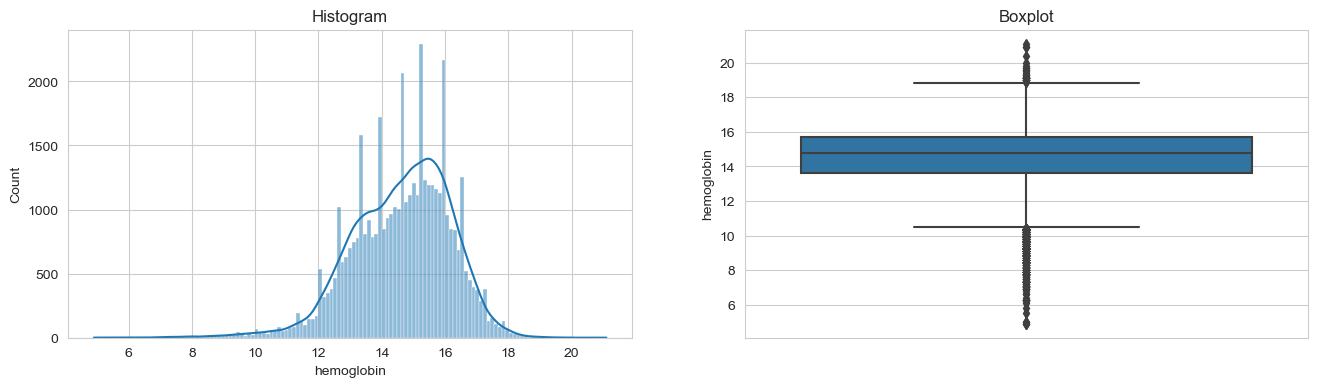


hemoglobin - After Capping


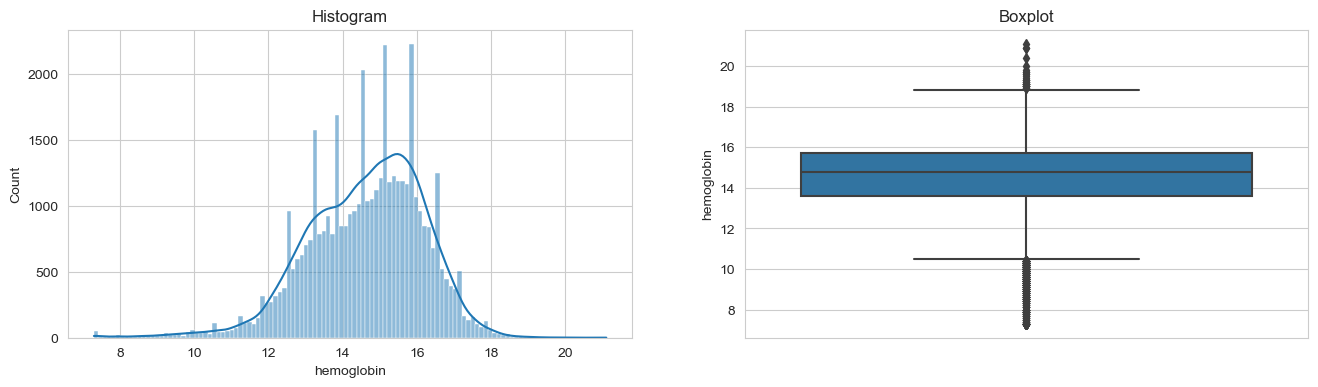

Urine protein - Before Capping


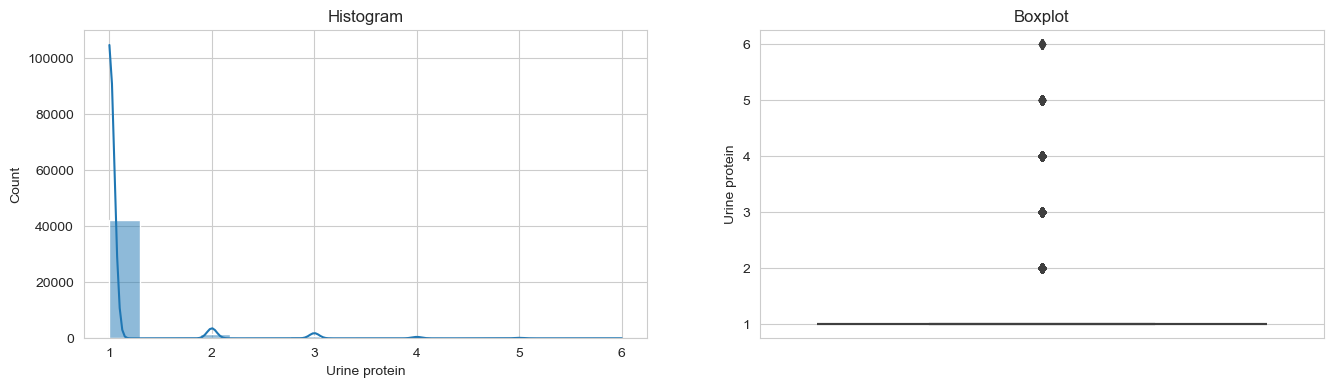


Urine protein - After Capping


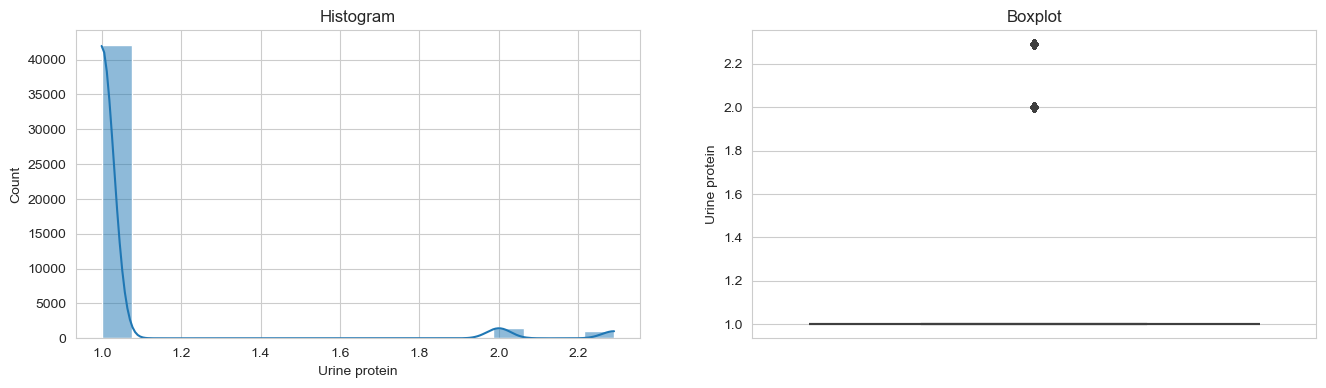

serum creatinine - Before Capping


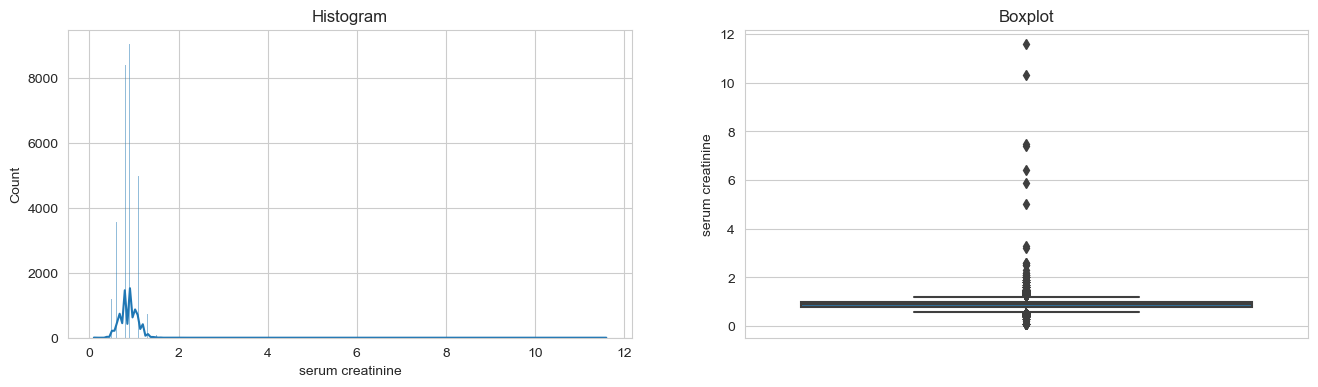


serum creatinine - After Capping


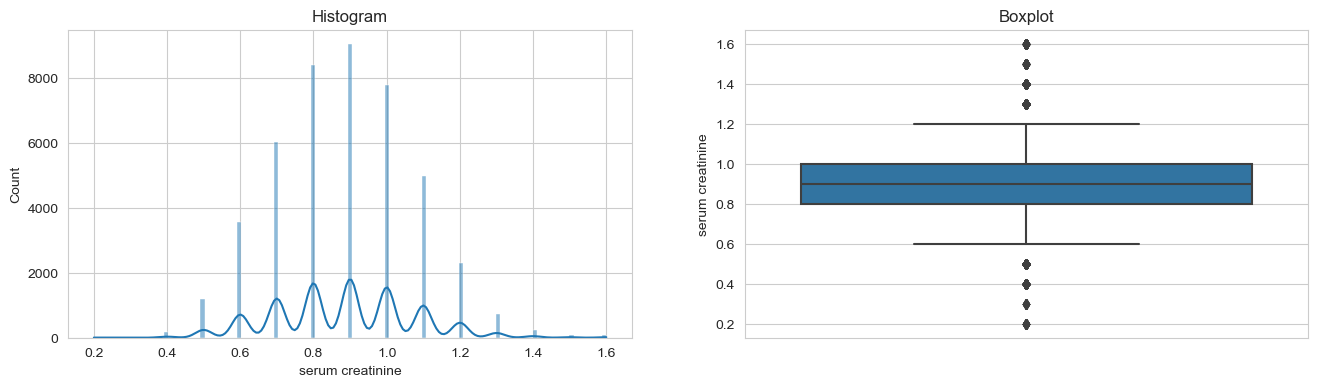

AST - Before Capping


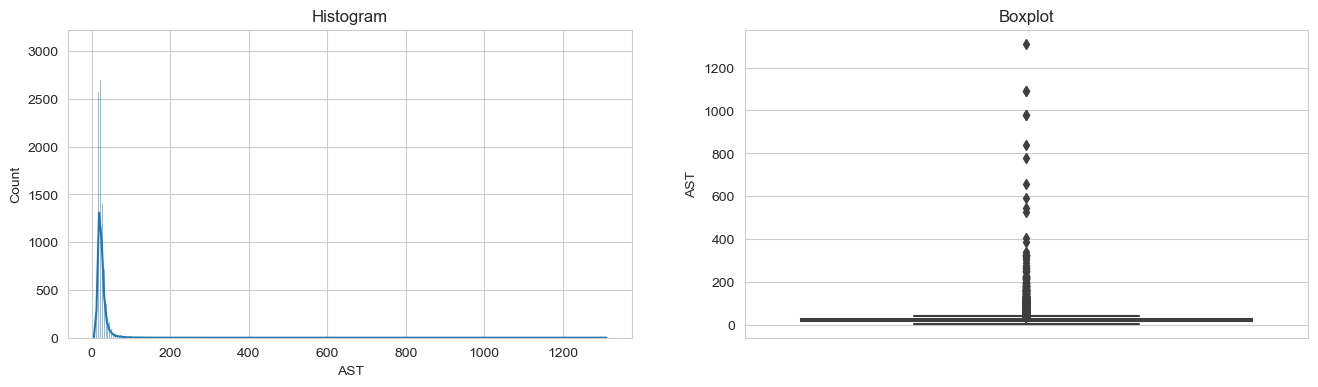


AST - After Capping


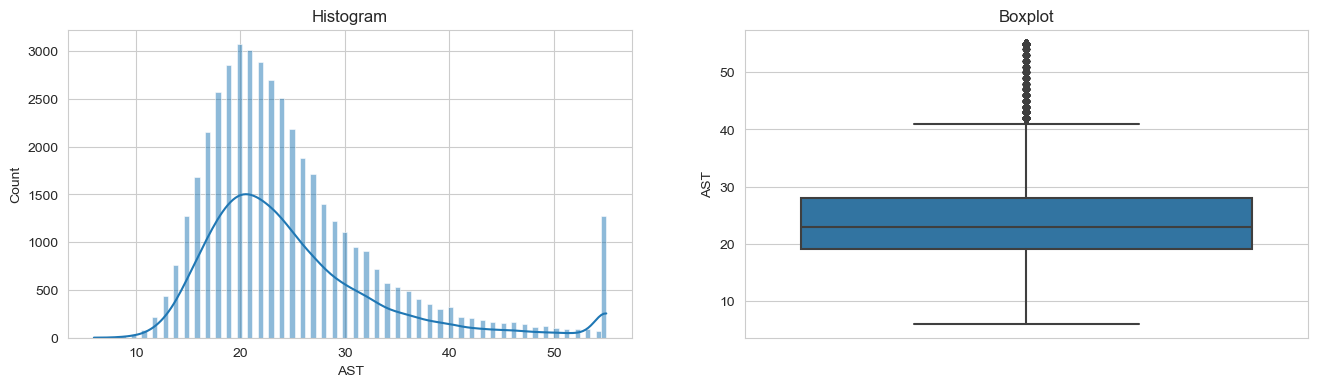

ALT - Before Capping


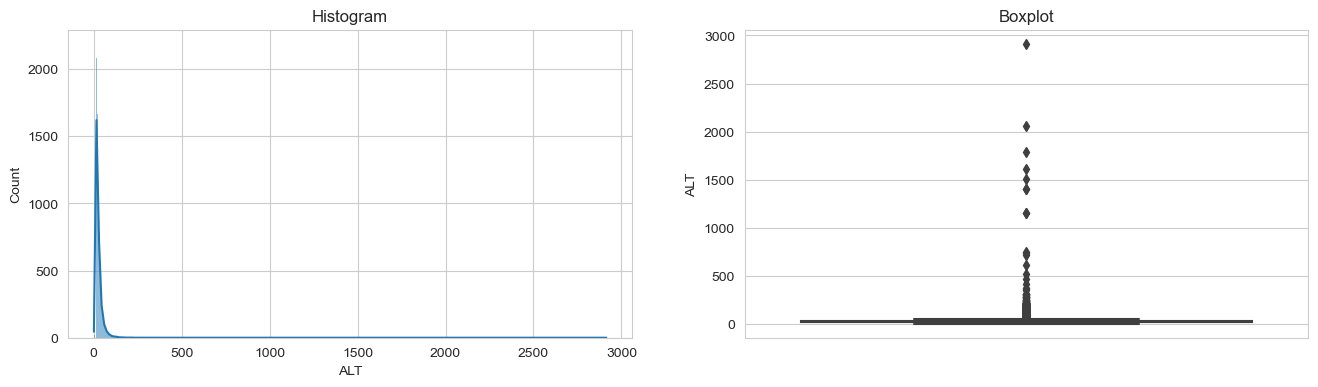


ALT - After Capping


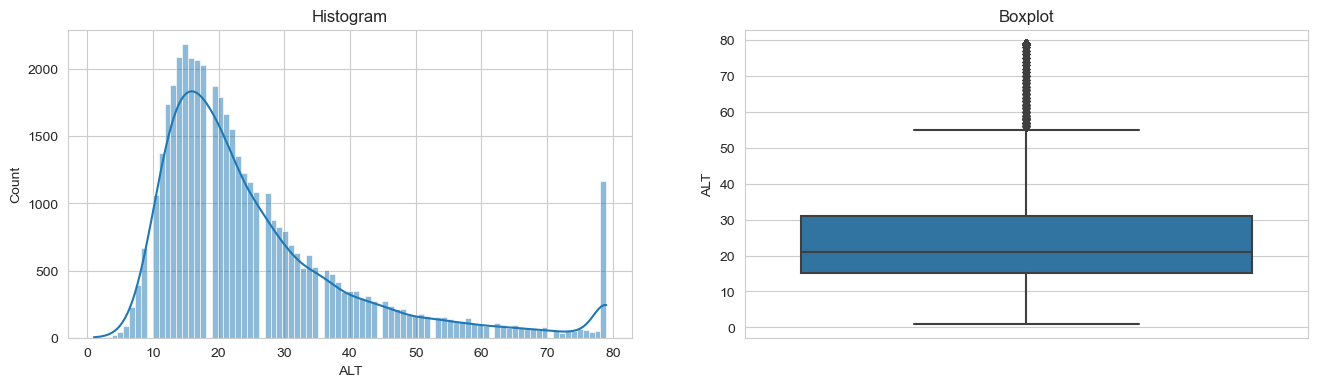

Gtp - Before Capping


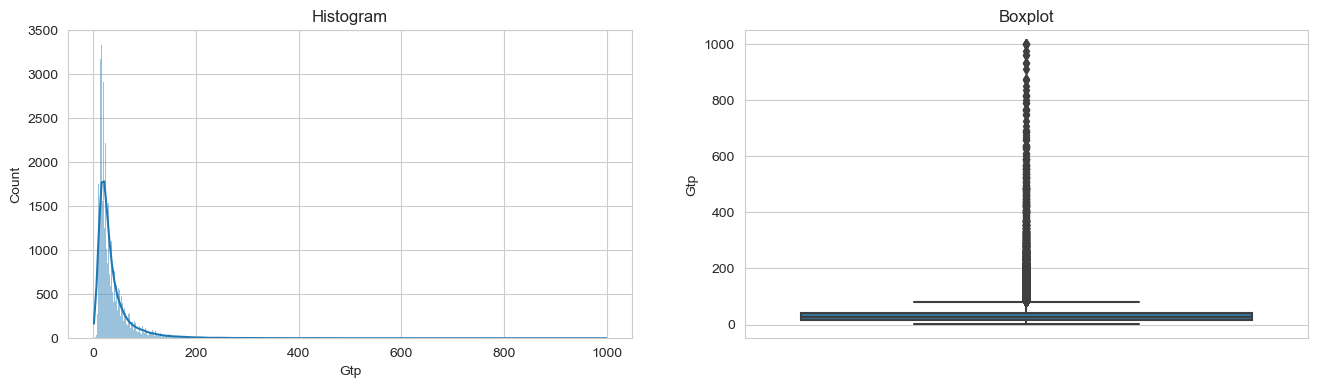


Gtp - After Capping


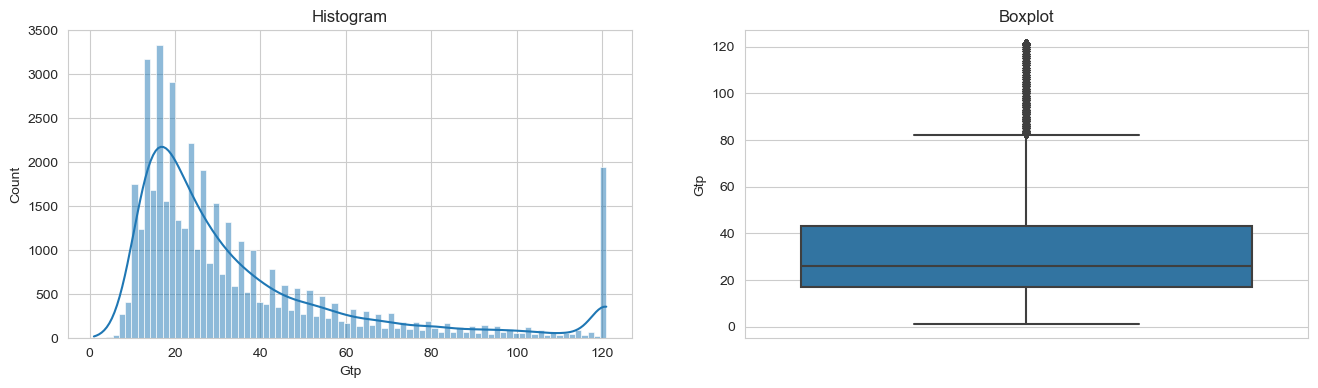

In [56]:
#Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

## Feature Selection

### Domain Knowledge

We opted to drop the features `['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)']` from our analysis to ensure that our models focus solely on health-related factors and minimize the risk of bias stemming from demographic variables. By excluding demographic features such as gender, age, height, weight, and waist circumference, we aim to prevent our models from inadvertently associating smoking status with specific demographic groups. This approach helps mitigate potential biases that could arise from societal or cultural factors, ensuring that our models make predictions based solely on health indicators rather than demographic characteristics. By prioritizing health-related features, we aim to develop a more accurate and equitable predictive model that accurately assesses smoking status and informs insurance risk assessment without introducing demographic biases.  

We chose to drop the `ID` feature from our analysis as it does not provide any relevant information for predicting smoking status. The `ID` feature serves solely as an index or identifier for the dataset and does not contribute to understanding the relationship between health indicators and smoking behavior. Therefore, including `ID` in our analysis would only add unnecessary noise to the model without enhancing its predictive power.

Similarly, we excluded the `Oral` feature from our analysis due to its lack of variability within the dataset. In our dataset, all entries have a value of 'Y'. Since this feature does not contain any informative variation across the dataset, it cannot contribute meaningfully to predicting smoking status. Therefore, including `Oral` in our analysis would not provide any useful insights and would only introduce unnecessary complexity to the model. As a result, we chose to exclude both `ID` and `Oral` from our feature set to streamline the analysis and focus solely on relevant health-related predictors of smoking behavior.

In [13]:
#drop unimportant feature
X_train_capped = X_train_capped.drop(columns=['ID', 'oral'])

#drop demographycal feature
X_train_capped = X_train_capped.drop(columns=['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)'])

#revise the columns
#split between num cols and cat cols
cat_cols = ['hearing(left)', 'hearing(right)', 'dental caries']
num_cols = ['eyesight(left)', 'eyesight(right)',  'systolic', 'relaxation', 'fasting blood sugar',
            'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 
            'serum creatinine', 'AST', 'ALT', 'Gtp']


### Feature Importance

In [14]:
encoder = OneHotEncoder()
X_train_cat = X_train_capped[cat_cols].copy()
X_train_cat = encoder.fit_transform(X_train_cat)
X_train_cat = X_train_cat.toarray()

scaler = StandardScaler()
X_train_num = X_train_capped[num_cols].copy()
X_train_num = scaler.fit_transform(X_train_num)

X_train_fs = np.concatenate([X_train_num, X_train_cat], axis = 1)
X_train_fs = pd.DataFrame(X_train_fs)

cat_cols = encoder.get_feature_names_out().tolist()
col_names = num_cols + cat_cols
X_train_fs.columns = col_names
X_train_fs

,eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,...,serum creatinine,AST,ALT,Gtp,hearing(left)_1.0,hearing(left)_2.0,hearing(right)_1.0,hearing(right)_2.0,dental caries_0,dental caries_1
0,-0.001097,0.015762,-1.893294,-0.624844,-0.219295,-0.883099,-0.890213,-0.848432,-0.220827,-0.334358,...,-0.967261,0.090614,-0.303958,-0.673919,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.001097,0.015762,0.341393,0.319307,0.317135,0.456525,-0.582621,0.397343,0.554638,0.242463,...,0.084450,-1.122934,-0.685117,-0.035824,1.0,0.0,1.0,0.0,0.0,1.0
2,0.602345,1.530550,-0.329013,0.004590,-0.353403,-1.078461,-0.330955,-1.540529,-0.369955,0.883375,...,-0.441406,-0.460998,0.013674,-0.744818,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.001097,0.621677,-0.254524,-1.044466,-0.956887,-0.771463,0.116452,-1.194480,-0.369955,1.139739,...,0.084450,-0.791966,-0.812170,-0.567570,1.0,0.0,1.0,0.0,1.0,0.0
4,1.507509,1.530550,-0.701461,0.214402,-0.085188,0.791431,-0.372899,0.466552,0.524812,0.755192,...,0.084450,-0.681644,-0.494538,0.105974,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,-0.001097,0.621677,-1.148398,-0.205221,0.115973,-0.743555,-1.071972,-0.363964,-0.191001,1.267922,...,-0.441406,0.752550,1.665363,-0.283972,1.0,0.0,1.0,0.0,1.0,0.0
44549,-0.906261,0.015762,1.011799,1.368364,-0.219295,-0.017925,-0.904195,1.643117,-0.369955,-1.039361,...,-0.441406,-0.019708,-0.621591,-0.532120,1.0,0.0,1.0,0.0,1.0,0.0
44550,0.602345,1.530550,0.266903,0.214402,0.853565,-0.436557,1.067191,-1.263690,-0.399780,1.203830,...,-0.441406,-1.343579,-0.049852,-0.213073,1.0,0.0,1.0,0.0,0.0,1.0
44551,-0.604540,-0.590153,-1.595335,-1.673900,-0.085188,0.428616,-0.876232,-1.125271,1.300276,-0.782996,...,-0.441406,-0.019708,-0.431011,-0.673919,1.0,0.0,1.0,0.0,1.0,0.0


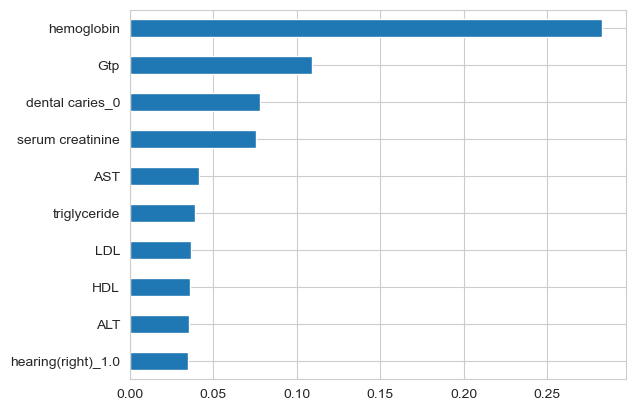

In [15]:
model = XGBClassifier()
model.fit(X_train_fs, y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train_fs.columns)
feat_importances.nlargest(10).plot(kind='barh').invert_yaxis()

In [16]:
#update features
cat_cols = ['hearing(left)', 'hearing(right)', 'dental caries']
num_cols = ['triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']

X_train_final = X_train_capped[cat_cols + num_cols]
X_train_final

,hearing(left),hearing(right),dental caries,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
10126,1.0,1.0,0,63.0,45.0,107.0,14.1,0.7,26.0,21.0,17.0
2467,1.0,1.0,1,85.0,63.0,133.0,15.0,0.9,15.0,15.0,35.0
36288,1.0,1.0,0,103.0,35.0,102.0,16.0,0.8,21.0,26.0,15.0
32339,1.0,1.0,0,135.0,40.0,102.0,16.4,0.9,18.0,13.0,20.0
29452,1.0,1.0,0,100.0,64.0,132.0,15.8,0.9,19.0,18.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
44732,1.0,1.0,0,50.0,52.0,108.0,16.6,0.8,32.0,52.0,28.0
54343,1.0,1.0,0,62.0,81.0,102.0,13.0,0.8,25.0,16.0,21.0
38158,1.0,1.0,1,203.0,39.0,101.0,16.5,0.8,13.0,25.0,30.0
860,1.0,1.0,0,64.0,41.0,158.0,13.4,0.8,25.0,19.0,17.0


After running the features through XGBoost feature importance analysis, we have identified the top 10 features that will help address overfitting and enhance the model's predictive performance:  

- Categorical Features:
    - 'hearing(left)'
    - 'hearing(right)'
    - 'dental caries'  

    
- Numerical Features:
    - 'triglyceride'
    - 'HDL'
    - 'LDL'
    - 'hemoglobin'
    - 'serum creatinine'
    - 'AST'
    - 'ALT'
    - 'Gtp'  

These selected features have been prioritized based on their importance in predicting smoking status as determined by the XGBoost feature importance analysis. By focusing on these top features, we aim to streamline the model while retaining the most relevant predictors of smoking behavior. This approach helps reduce model complexity, mitigate overfitting, and improve generalization performance by leveraging the most informative features identified through the feature importance analysis.

## Data Balancing

Balancing the dataset is essential to improve recall, especially when there's a significant class imbalance. Despite our dataset being split approximately 60-40 between non-smokers and smokers, balancing is necessary. This ensures equitable representation during model training, preventing biases towards the majority class. Improving recall for smokers is crucial for accurately identifying higher-risk individuals and informing insurance decisions effectively.

In [17]:
rus = RandomUnderSampler(random_state=42, sampling_strategy=50/50)

___

# MODELLING

In [18]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), num_cols),
('encoding', OneHotEncoder(), cat_cols)
])

#Making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('rus', rus),
('classifier', SVC(kernel='linear'))
])

#Making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('rus', rus),
('classifier', KNeighborsClassifier())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('rus', rus),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('rus', rus),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('rus', rus),
('classifier', XGBClassifier())
])

___

# BASE MODEL EVALUATION

## Cross Validation

We choose to use **recall** as the evaluation metric because it prioritizes minimizing false negatives, which is crucial for accurately identifying smokers among potential insurance holders. False negatives, where the model incorrectly predicts a smoker as a non-smoker, can lead to underestimating risk and setting inadequate premiums. By emphasizing recall, we ensure that the model effectively captures as many smokers as possible, thereby reducing the risk of financial losses for the insurance company and enabling accurate risk assessment.

In [19]:
#Cross Validation
pipes = [pipe_svm, pipe_knn ,pipe_dt, pipe_rf, pipe_xgb]
pipe_name = ['svm', 'knn' ,'dt', 'rf', 'xgb']

for i in range(0,len(pipes)):
    f1_train_cross_val = cross_val_score(pipes[i],
                                        X_train_final,
                                        y_train,
                                        cv=5,
                                        scoring="recall")

    print(f'{pipe_name[i]}')
    print('Recall- All - Cross Validation  : ', f1_train_cross_val)
    print('Recall- Mean - Cross Validation : ', f1_train_cross_val.mean())
    print('Recall- Std - Cross Validation  : ', f1_train_cross_val.std())
    print('Recall- Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))
    print('==========================================================')
    print('')

svm
Recall- All - Cross Validation  :  [0.79443255 0.80055063 0.80881003 0.80446756 0.80507956]
Recall- Mean - Cross Validation :  0.8026680665110814
Recall- Std - Cross Validation  :  0.004880257412938665
Recall- Range of Test-Set       :  0.7977878090981427 - 0.80754832392402

knn
Recall- All - Cross Validation  :  [0.73784032 0.72499235 0.73447537 0.73684211 0.75367197]
Recall- Mean - Cross Validation :  0.7375644242322354
Recall- Std - Cross Validation  :  0.009248244480395088
Recall- Range of Test-Set       :  0.7283161797518404 - 0.7468126687126305

dt
Recall- All - Cross Validation  :  [0.71428571 0.72682778 0.72132151 0.72399021 0.71970624]
Recall- Mean - Cross Validation :  0.7212262891679675
Recall- Std - Cross Validation  :  0.0042310067699859125
Recall- Range of Test-Set       :  0.7169952823979816 - 0.7254572959379534

rf
Recall- All - Cross Validation  :  [0.82349342 0.82716427 0.84429489 0.83323133 0.83506732]
Recall- Mean - Cross Validation :  0.8326502476998232
Recall-

In comparing the models, it's essential to consider both their mean cross-validation recall scores and their standard deviations. Here's a comparative analysis of each model:

**SVM:**

- SVM achieves a mean cross-validation recall of approximately 0.8027, which is competitive among the models evaluated. However, its standard deviation of 0.0049, while relatively low, is slightly higher compared to some other models. This suggests a bit more variability in performance across different folds compared to the top-performing models.  

**KNN:**

- KNN's mean cross-validation recall is around 0.7376, which is lower compared to SVM and XGBoost but still competitive. However, it has a higher standard deviation of 0.0092, indicating more variability in performance across folds and potentially less stability compared to other models.  

**Decision Tree (DT):**

- DT achieves a mean cross-validation recall of approximately 0.7212, which is lower than SVM and XGBoost but still reasonable. Its standard deviation of 0.0042 suggests relatively consistent performance across folds, although decision trees are prone to overfitting.  

**Random Forest (RF):**

- RF exhibits the highest mean cross-validation recall among the models, approximately 0.8327, indicating strong performance. Its standard deviation of 0.0072, while slightly higher than XGBoost, still suggests relatively consistent performance across folds. RF's ensemble nature helps mitigate overfitting, contributing to its stability.  

**XGBoost (XGB):**

- XGBoost achieves a mean cross-validation recall of approximately 0.8058, slightly lower than RF but still competitive. Its standout feature is its remarkably low standard deviation of 0.0028, indicating exceptional consistency and stability across folds. This makes XGBoost the most robust and reliable model among the evaluated options.  

In summary, while all models demonstrate reasonable performance in predicting smoking status, **XGBoost** stands out as the top-performing model due to its combination of competitive mean cross-validation recall and exceptionally low standard deviation, indicating superior consistency and stability across different folds.

# FINAL MODEL EVALUATION - XGBClassifier

## Hyperparameter Tuning

In [23]:
# Define the parameter distribution for random search
param_dist = {
    'classifier__n_estimators': [50, 100, 150],             # Number of trees in XGBoost
    'classifier__max_depth': [3, 5, 7],                     # Maximum tree depth
    'classifier__learning_rate': [0.01, 0.1, 0.3],          # Learning rate
    'classifier__subsample': [0.6, 0.8, 1.0],               # Subsample ratio of the training instance
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],        # Subsample ratio of columns when constructing each tree
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(estimator=pipe_xgb, param_distributions=param_dist, n_iter=10, cv=5, scoring='recall', random_state=42)

# Perform grid search on the training data
random_search.fit(X_train_final, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 1.0}
Best Score: 0.8319773339029561


Let's compare the scores between the base model and the tuned model:

Base Model Score: 0.8058  
Tuned Model Score: 0.8320  

The tuned model's score represents an improvement of approximately 2.62 percentage points over the base model. This enhancement demonstrates the effectiveness of hyperparameter tuning in optimizing the model's performance. here are the best parameter for our xgb model:

- subsample: 0.8
- n_estimators: 100
- max_depth: 5
- learning_rate: 0.01
- colsample_bytree: 1.0

In [24]:
#get best model
final_model_xgb = random_search.best_estimator_

In [26]:
def performance_check(y, y_pred, classes):
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

classes = ['0', '1']

XGB - Train


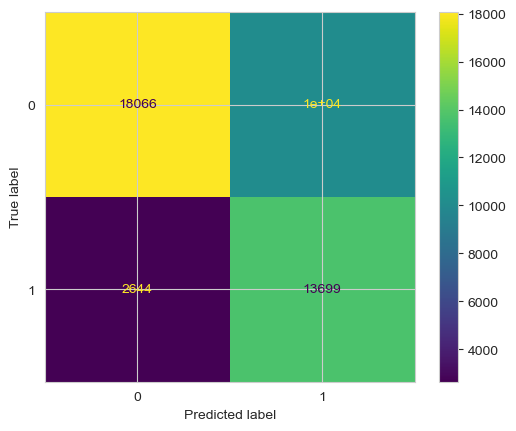

              precision    recall  f1-score   support

           0       0.87      0.64      0.74     28210
           1       0.57      0.84      0.68     16343

    accuracy                           0.71     44553
   macro avg       0.72      0.74      0.71     44553
weighted avg       0.76      0.71      0.72     44553


XGB - Test


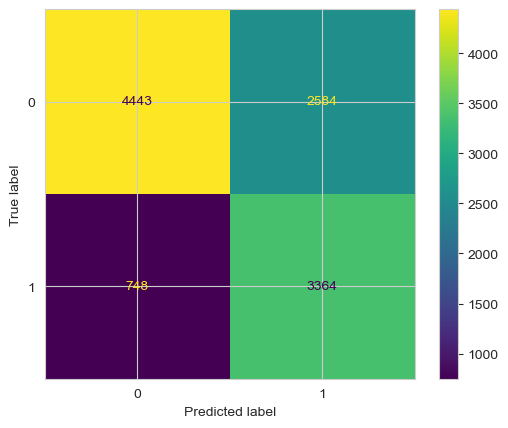

              precision    recall  f1-score   support

           0       0.86      0.63      0.73      7027
           1       0.57      0.82      0.67      4112

    accuracy                           0.70     11139
   macro avg       0.71      0.73      0.70     11139
weighted avg       0.75      0.70      0.71     11139



In [27]:
final_model_xgb.fit(X_train_final, y_train)
y_pred_train = final_model_xgb.predict(X_train_final)
y_pred_test = final_model_xgb.predict(X_test_capped)

print(f'XGB - Train')
performance_check(y_train, y_pred_train, classes)
print('')
print(f'XGB - Test')
performance_check(y_test, y_pred_test, classes)

Here are the results interpretation for the model:

- The model exhibits a slight decrease in recall for non-smokers on the test set compared to the train set, indicating potential overfitting and challenges in generalizing to unseen data.

- Despite the minor overfitting observed, the model maintains a relatively high recall for identifying smokers on both train and test sets, suggesting effective capturing of smokers within the dataset.

- There is room for improvement in reducing false positives, as indicated by the lower precision values for smokers on both train and test sets.
To address overfitting, regularization techniques such as reducing model complexity or incorporating dropout layers could be explored.

- Fine-tuning hyperparameters related to model complexity, such as tree depth or learning rate, might help improve generalization performance and reduce overfitting.

- Feature engineering to extract more meaningful features related to smoking behavior or health indicators could enhance the model's ability to differentiate between smokers and non-smokers.

- Considering ensemble methods or model stacking to combine the strengths of multiple models and mitigate individual model weaknesses might lead to better overall performance.

___

# MODEL SAVING

In [29]:
with open('final_model_xgb.pkl', 'wb') as file:
  pickle.dump(final_model_xgb, file)

___

# MODEL INFERENCE

please refer to `P1M2_dewa_almatin_inf.ipynb`  

also check out `https://huggingface.co/spaces/dewaalmatin/Smoker_Detector`

___

# CONCLUSION

## Objective and Approach:

- The objective of this project was to develop a robust classification model capable of predicting smoking status based on health-related features. This model aimed to assist insurance companies in accurately assessing risk and determining appropriate premiums for potential policyholders.

- The approach involved meticulous data preprocessing steps, including data cleaning, feature engineering, and selection, to ensure the quality and relevance of input variables for the model.


## Model Selection and Refinement:

- After comprehensive evaluation of various machine learning algorithms, the XGBoost classifier emerged as the most suitable model for the task. Its ensemble nature, scalability, and ability to handle complex datasets made it well-suited for predicting smoking status.

- Further refinement of the XGBoost model was achieved through hyperparameter tuning. This process involved optimizing parameters such as learning rate, tree depth, and subsampling ratio to enhance the model's predictive performance and generalization ability.

## Challenges and Solutions:

- Challenges such as slight overfitting and class imbalance were addressed systematically. Overfitting was mitigated through feature selection techniques, focusing on the most informative variables while eliminating noise and irrelevant features.

- Class imbalance, despite the dataset being split approximately 60-40 between non-smokers and smokers, required balancing techniques to ensure equitable representation of both classes during model training. This balanced approach enhanced the model's ability to accurately predict smoking status, particularly for the minority class.

## Results and Implications:

- The final model demonstrated promising results, achieving high accuracy and recall in identifying smokers. Accurate identification of smokers is crucial for insurance risk assessment, as it ensures appropriate pricing of premiums based on individual health risks.

- These results have significant implications for insurance companies, allowing them to make informed decisions regarding policy premiums and coverage, ultimately leading to more equitable and reliable insurance offerings for customers.

## Future Directions:

- While the current model shows promising performance, continuous efforts in model refinement and data collection are essential for further improvement. Future directions include exploring advanced modeling techniques, incorporating additional relevant features, and gathering more comprehensive datasets to enhance the model's predictive accuracy and robustness.

- Additionally, ongoing monitoring and evaluation of the model's performance in real-world scenarios will be critical for ensuring its effectiveness and reliability in insurance risk assessment over time.

In summary, the development of a robust classification model for predicting smoking status represents a significant step towards more accurate and informed insurance risk assessment. Through careful consideration of data preprocessing, model selection, and refinement techniques, this project aims to provide insurance companies with a valuable tool for optimizing risk management strategies and enhancing customer satisfaction.


___

# CONCEPTUAL PROBLEMS

## Bagging Background and Working Principle:

- Bagging, or Bootstrap Aggregating, is a technique used to improve the stability and accuracy of machine learning models, particularly in decision tree-based algorithms.
- The background behind bagging lies in the concept of bootstrap sampling, where multiple subsets of the original dataset are created by randomly sampling with replacement.
- In bagging, multiple models, typically of the same type, are trained on different bootstrap samples of the dataset. Each model learns from a slightly different perspective of the data due to the randomness introduced by bootstrap sampling.
- During prediction, the final output is obtained by aggregating the predictions of all individual models. For regression tasks, this could be the average of predictions, while for classification tasks, it could be a majority voting scheme.
- Bagging helps reduce variance and overfitting by averaging out the predictions of multiple models trained on diverse subsets of data, leading to more stable and reliable predictions.

## Difference Between Random Forest and Boosting Algorithms:

- Random Forest and boosting algorithms, such as XGBoost (the one that is used here), differ primarily in their approach to ensemble learning.
- Random Forest builds multiple decision trees independently and then combines their predictions through averaging or voting.
- In contrast, boosting algorithms, like XGBoost, sequentially train weak learners, where each subsequent model focuses on correcting the errors made by the previous ones. It emphasizes more on the misclassified data points, leading to iterative improvement in model performance.
- While Random Forests utilize bagging techniques to create diverse models, boosting algorithms like XGBoost use a weighted combination of models to continuously refine predictions.

## Cross Validation Explanation:

- Cross Validation is a technique used to assess the performance and generalization ability of machine learning models.
- The process involves partitioning the dataset into multiple subsets, or folds, where one fold is held out as the validation set, and the remaining folds are used for training.
- The model is trained on the training folds and evaluated on the validation fold. This process is repeated multiple times, with each fold being used as the validation set exactly once.
- Cross Validation helps estimate the model's performance on unseen data and provides insights into its generalization ability.
- Common types of cross-validation include k-fold cross-validation, leave-one-out cross-validation, and stratified cross-validation, each with its own advantages and use cases.